In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from scipy.spatial import ConvexHull
from scipy.ndimage import gaussian_filter1d
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib import cm
from rd_solver import *
from itertools import combinations, product
import importlib
import warnings
warnings.filterwarnings("ignore")

from shared import *

In [ ]:
import simulation_loader
importlib.reload(simulation_loader)
simulations = simulation_loader.Simulations(
    result_path="/run/media/cdmium/59370B2D238DE854/proofreading/result_20250303",
    parameter_path="parameters_20250218_jR",
)
betas = ["baseline"]
for b in simulations.get_keys():
    if b != betas[0]:
        betas.append(b)

<<<<<<< local <modified: >


Parameters loaded.
{('parameters', None): (40000, 5)}
reading b_ac1_k_ac3
reading b_ac0.5
reading b_ac1_k_ac6
reading b_ac1
reading b_ac1_n_ac6
reading b_ac1_n_ac3
reading b_ac_rp1
reading baseline
reading b_rp1
reading b_ac2
reading sender_ratio3
reading sender_region451
Simulations result loaded.
{'b_ac1_k_ac3': (40000, 8), 'b_ac0.5': (40000, 8), 'b_ac1_k_ac6': (40000, 8), 'b_ac1': (40000, 8), 'b_ac1_n_ac6': (40000, 8), 'b_ac1_n_ac3': (40000, 8), 'b_ac_rp1': (40000, 8), 'baseline': (40000, 8), 'b_rp1': (40000, 8), 'b_ac2': (40000, 8), 'sender_ratio3': (40000, 8), 'sender_region451': (40000, 8)}


Parameters loaded.
{('parameters', None): (40000, 5)}
reading b_ac1
reading baseline
reading b_ac1_k_ac3
reading b_ac0.5
reading b_rp1
reading b_ac_rp1
reading b_ac1_k_ac6
reading b_ac1_n_ac3
reading b_ac1_n_ac6
reading sender_ratio3
reading b_ac2
reading sender_region451
Simulations result loaded.
{'b_ac1': (40000, 8), 'baseline': (40000, 8), 'b_ac1_k_ac3': (40000, 8), 'b_ac0.5': (40000, 8), 'b_rp1': (40000, 8), 'b_ac_rp1': (40000, 8), 'b_ac1_k_ac6': (40000, 8), 'b_ac1_n_ac3': (40000, 8), 'b_ac1_n_ac6': (40000, 8), 'sender_ratio3': (40000, 8), 'b_ac2': (40000, 8), 'sender_region451': (40000, 8)}


>>>>>>> remote <modified: >


In [ ]:
xlim = [-1, 10]
ylim = [-3, 3]
aspect_ratio = 1
branchname = "different-beta-mutual-inhibition"

In [4]:
# Desired plot area size for each subplot (in inches)
PLOT_WIDTH = 2.5
PLOT_HEIGHT = 2.5
LEFT_MARGIN = 0.8   # Space for y-tick labels
BOTTOM_MARGIN = 0.6  # Space for x-tick labels
TITLE_SPACE = 0.4   # Space for subplot title
RIGHT_MARGIN = 0.2  # Right buffer
TOP_BUFFER = 0.4

def format_10n(x, pos):
    return f"$10^{{{int(x)}}}$"


def format_subplots(fig, axes, plot_width=PLOT_WIDTH, plot_height=PLOT_HEIGHT):
    """
    Adjust subplots from plt.subplots() to have a fixed plot area size with reserved space.
    Args:
        fig: Matplotlib Figure object
        axes: Array of Axes objects (or single Axes)
        plot_width: Width of each subplot's plot area (inches)
        plot_height: Height of each subplot's plot area (inches)
    """
    # Normalize axes to 2D array
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    if axes.ndim == 1:
        axes = axes.reshape(-1, 1)
    n_rows, n_cols = axes.shape

    # Calculate total figure size based on fixed dimensions
    total_plot_width = n_cols * plot_width
    total_plot_height = n_rows * (plot_height + TITLE_SPACE)  # Add title space per row
    fig_width = LEFT_MARGIN + total_plot_width + RIGHT_MARGIN
    fig_height = BOTTOM_MARGIN + total_plot_height + TOP_BUFFER

    # Resize figure
    fig.set_size_inches(fig_width, fig_height)

    # Reposition each subplot
    for i in range(n_rows):
        for j in range(n_cols):
            ax = axes[i, j]
            # Position in figure coordinates (0-1)
            left = (LEFT_MARGIN + j * plot_width) / fig_width
            # Bottom starts from top, accounting for title space
            bottom = (TOP_BUFFER + (n_rows - 1 - i) * (plot_height + TITLE_SPACE) + TITLE_SPACE) / fig_height
            width = plot_width / fig_width
            height = plot_height / fig_height
            ax.set_position([left, bottom, width, height])

            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
            ax.spines['left'].set_color('k')
            ax.spines['left'].set_linewidth(1.0)
            ax.spines['bottom'].set_color('k')
            ax.spines['bottom'].set_linewidth(1.0)
            ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_10n))
            ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_10n))

In [ ]:
# basic scatter plot

fig, axs = plt.subplots(
    len(betas) - 1, 2, figsize=(2 * 5, (len(betas) - 1) * 4)
)

for i, beta in enumerate(betas[1:]):
    # Change point color to red
    axs[i, 0].scatter(
        simulations.get_fidelity_log("baseline"),
        simulations.get_AC_log("baseline"),
        2,
        color=[0.4, 0.4, 0.4],
        alpha=1
    )
    axs[i, 0].title.set_text("baseline no feedback")
    axs[i, 1].scatter(
        simulations.get_fidelity_log("baseline"),
        simulations.get_AC_log("baseline"),
        2,
        color=[0.4, 0.4, 0.4],
        alpha=1
    )
    axs[i, 1].scatter(
        simulations.get_fidelity_log(beta),
        simulations.get_AC_log(beta),
        2, color='red', alpha=0.2
    )
    axs[i, 1].title.set_text(beta)
for ax in axs.flatten():
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # ax.plot([0, 25], [1.5, -11])

    ax.set_facecolor('#F3F3F3')
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1.0)

    ax.tick_params(axis="y", labelleft=True, size=14)
    ax.tick_params(axis="x", labelbottom=True, size=14)
    ax.tick_params(axis="y", labelleft=True, size=14)
    ax.tick_params(axis="x", labelbottom=True, size=14)

# plt.savefig("simple_scatter.svg")
plt.show()

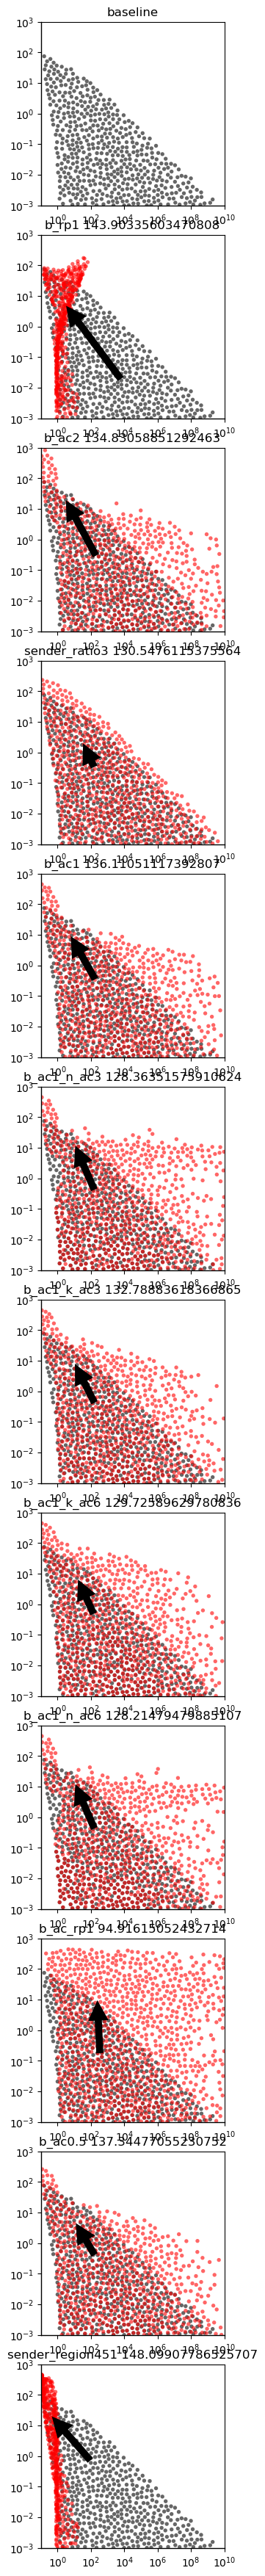

In [7]:
# add subset of proofreading and enough concentration
for b in betas:
    simulations.add_subset(
        ("proofreading", b),
        np.bitwise_and(
            simulations.get_fidelity_log(b) > 0,
            simulations.get_subset(subsets=[("valid", b)])
        )
    )
for b in betas:
    simulations.add_subset(
        ("active", b),
        np.bitwise_and(
            simulations.get_AC_log(b) > -1,
            simulations.get_subset(subsets=[("valid", b)])
        )
    )

# simplified scatter
distance_threshold = 0.022

# create subset for simplified data
for b in betas:
    subset = []
    f_simple = np.array([])
    ac_simple = np.array([])
    for f, ac in zip(
        simulations.get_fidelity_log(b), simulations.get_AC_log(b)
    ):
        if f < xlim[0] or f > xlim[1] or ac < ylim[0] or ac > ylim[1]:
            subset.append(False)
        elif np.all(
            np.linalg.norm(
                np.array(
                    [
                        (f_simple - f) / (xlim[1] - xlim[0]),
                        (ac_simple - ac) / (ylim[1] - ylim[0])
                    ]
                ),
                axis=0
            ) > distance_threshold
        ):
            f_simple = np.append(f_simple, f)
            ac_simple = np.append(ac_simple, ac)
            subset.append(True)
        else:
            subset.append(False)
    subset = np.array(subset)
    # increase point number for group with too small point set
    if b != "baseline" and len(f_simple) < np.count_nonzero(
        simulations.get_subset(subsets=[("simplified", "baseline")])
    ):
        false_indices = np.where(subset == False)[0]
        indices_to_change = np.random.choice(
            false_indices,
            size=np.count_nonzero(
                simulations.get_subset(subsets=[("simplified", "baseline")])
            ) - len(f_simple),
            replace=False
        )
        subset[indices_to_change] = True

    simulations.add_subset(
        ("simplified", b),
        subset
    )


fig, axs = plt.subplots(len(betas), 1, figsize=(5, len(betas) * 5))
plt.subplots_adjust(
    left=0.1,
    right=0.9,
    bottom=0.1,
    top=0.9,
    wspace=0.5,
    hspace=0.5
)

axs[0].scatter(
    simulations.get_fidelity_log(
        beta="baseline", subsets=["simplified"]
    ),
    simulations.get_AC_log(
        beta="baseline", subsets=["simplified"]
    ),
    15,
    color=[0.4, 0.4, 0.4],
    alpha=1,
    edgecolor="none",
)
axs[0].title.set_text(betas[0])
for i, b in enumerate(betas[1:]):
    i = [3, 5, 9, 0, 8, 6, 4, 7, 2, 1, 10][i]

    axs[i + 1].scatter(
        simulations.get_fidelity_log(
            beta="baseline", subsets=["simplified"]
        ),
        simulations.get_AC_log(
            beta="baseline", subsets=["simplified"]
        ),
        15,
        color=[0.4, 0.4, 0.4],
        alpha=1,
        edgecolor="none",
    )
    axs[i + 1].scatter(
        simulations.get_fidelity_log(
            beta=b, subsets=["simplified"]
        ),
        simulations.get_AC_log(
            beta=b, subsets=["simplified"]
        ),
        15,
        color='red',
        alpha=0.6,
        edgecolor="none",
    )

    # add arrow to indicate overall change
    test_subset = np.any(
        [
            simulations.get_subset(
                subsets=[
                    ("proofreading", "baseline"),
                    ("active", "baseline"),
                    ("valid", "baseline")
                ]
            ),
            simulations.get_subset(
                subsets=[
                    ("proofreading", b),
                    ("active", b),
                    ("valid", b)
                ]
            ),
        ], axis=0
    )
    test_subset = np.bitwise_and(
        test_subset,
        simulations.get_subset(
            subsets=[("valid", "baseline")]
        ),
    )
    test_subset = np.bitwise_and(
        test_subset,
        simulations.get_subset(
            subsets=[("valid", b)]
        ),
    )
    fidelity_mean_baseline = np.mean(
        simulations.get_fidelity_log(beta="baseline")[test_subset]
    )
    ac_mean_baseline = np.mean(
        simulations.get_AC_log(beta="baseline")[test_subset]
    )
    fidelity_mean_b = np.mean(
        simulations.get_fidelity_log(beta=b)[test_subset]
    )
    ac_mean_b = np.mean(
        simulations.get_AC_log(beta=b)[test_subset]
    )
    # axs[i + 1].annotate(
    #     "",
    #     xy=(fidelity_mean_b, ac_mean_b),
    #     xytext=(fidelity_mean_baseline, ac_mean_baseline),
    # )
    axs[i + 1].annotate(
        "",
        xy=(fidelity_mean_b, ac_mean_b),
        xytext=(fidelity_mean_baseline, ac_mean_baseline),
        arrowprops=dict(
            # arrowstyle="->",
            facecolor='black',
            linewidth=0,
            shrink=0,
            width=7,
            headlength=20,
            frac=100,
            headwidth=20,
        )
    )
    # print(fidelity_mean_baseline, ac_mean_baseline)
    # print(fidelity_mean_b, ac_mean_b)
    # print(
    #     beta,
    #     np.arctan2(
    #         ac_mean_b - ac_mean_baseline,
    #         fidelity_mean_b - fidelity_mean_baseline
    #     ) / np.pi * 180
    # )
    axs[i + 1].title.set_text(
        b + " " + str(np.arctan2(
            ac_mean_b - ac_mean_baseline,
            fidelity_mean_b - fidelity_mean_baseline
        ) / np.pi * 180)
    )


format_subplots(fig, axs)

plt.savefig(branchname + " simplified_scatter.svg")
plt.show()
#  TODO highlight

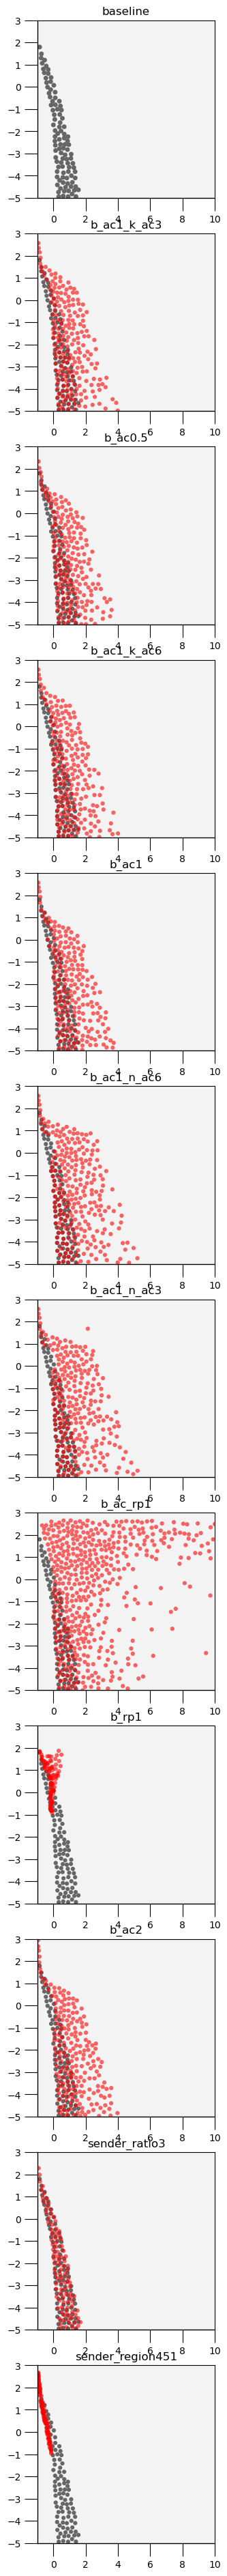

In [ ]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
import matplotlib.ticker as ticker

# add subset of proofreading and enough concentration
for b in betas:
    simulations.add_subset(
        ("proofreading", b),
        np.bitwise_and(
            simulations.get_fidelity_log(b) > 0,
            simulations.get_subset(subsets=[("valid", b)])
        )
    )
for b in betas:
    simulations.add_subset(
        ("active", b),
        np.bitwise_and(
            simulations.get_AC_log(b) > -1,
            simulations.get_subset(subsets=[("valid", b)])
        )
    )

# simplified scatter
distance_threshold = 0.022

# create subset for simplified data
for b in betas:
    subset = []
    f_simple = np.array([])
    ac_simple = np.array([])
    for f, ac in zip(
        simulations.get_fidelity_log(b), simulations.get_AC_log(b)
    ):
        if f < xlim[0] or f > xlim[1] or ac < ylim[0] or ac > ylim[1]:
            subset.append(False)
        elif np.all(
            np.linalg.norm(
                np.array(
                    [
                        (f_simple - f) / (xlim[1] - xlim[0]),
                        (ac_simple - ac) / (ylim[1] - ylim[0])
                    ]
                ),
                axis=0
            ) > distance_threshold
        ):
            f_simple = np.append(f_simple, f)
            ac_simple = np.append(ac_simple, ac)
            subset.append(True)
        else:
            subset.append(False)
    subset = np.array(subset)
    # increase point number for group with too small point set
    if b != "baseline" and len(f_simple) < np.count_nonzero(
        simulations.get_subset(subsets=[("simplified", "baseline")])
    ):
        false_indices = np.where(subset == False)[0]
        indices_to_change = np.random.choice(
            false_indices,
            size=np.count_nonzero(
                simulations.get_subset(subsets=[("simplified", "baseline")])
            ) - len(f_simple),
            replace=False
        )
        subset[indices_to_change] = True

    simulations.add_subset(
        ("simplified", b),
        subset
    )


fig, axs = plt.subplots(len(betas), 1, figsize=(5, len(betas) * 4))


def format_10n(x, pos):
    return f"$10^{{{int(x)}}}$"

axs[0].scatter(
    simulations.get_fidelity_log(
        beta="baseline", subsets=["simplified"]
    ),
    simulations.get_AC_log(
        beta="baseline", subsets=["simplified"]
    ),
    25,
    color=[0.4, 0.4, 0.4],
    alpha=1,
    edgecolor="none",
)
axs[0].title.set_text(betas[0])

for i, b in enumerate(betas[1:]):
    axs[i + 1].scatter(
        simulations.get_fidelity_log(
            beta="baseline", subsets=["simplified"]
        ),
        simulations.get_AC_log(
            beta="baseline", subsets=["simplified"]
        ),
        20,
        color=[0.4, 0.4, 0.4],
        alpha=1,
        edgecolor="none",
    )
    axs[i + 1].scatter(
        simulations.get_fidelity_log(
            beta=b, subsets=["simplified"]
        ),
        simulations.get_AC_log(
            beta=b, subsets=["simplified"]
        ),
        20,
        color='red',
        alpha=0.6,
        edgecolor="none",
    )
    axs[i + 1].title.set_text(b)

for ax in axs.flatten():
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_box_aspect(aspect_ratio)
    # ax.plot([0, 25], [1.5, -11])

    ax.set_facecolor('#F3F3F3')
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1.0)
    # ax.set_aspect('equal', 'box')

    # ax.tick_params(axis="y", labelleft=True, size=14, length =14)
    # ax.tick_params(axis="x", labelbottom=True, size=14, length =1)
    # ax.tick_params(axis="y", labelleft=True, size=14, length =1)
    # ax.tick_params(axis="x", labelbottom=True, size=14, length =1)

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_10n))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_10n))

plt.savefig(branchname + " simplified_scatter.svg")
plt.show()
#  TODO highlight

<<<<<<< local


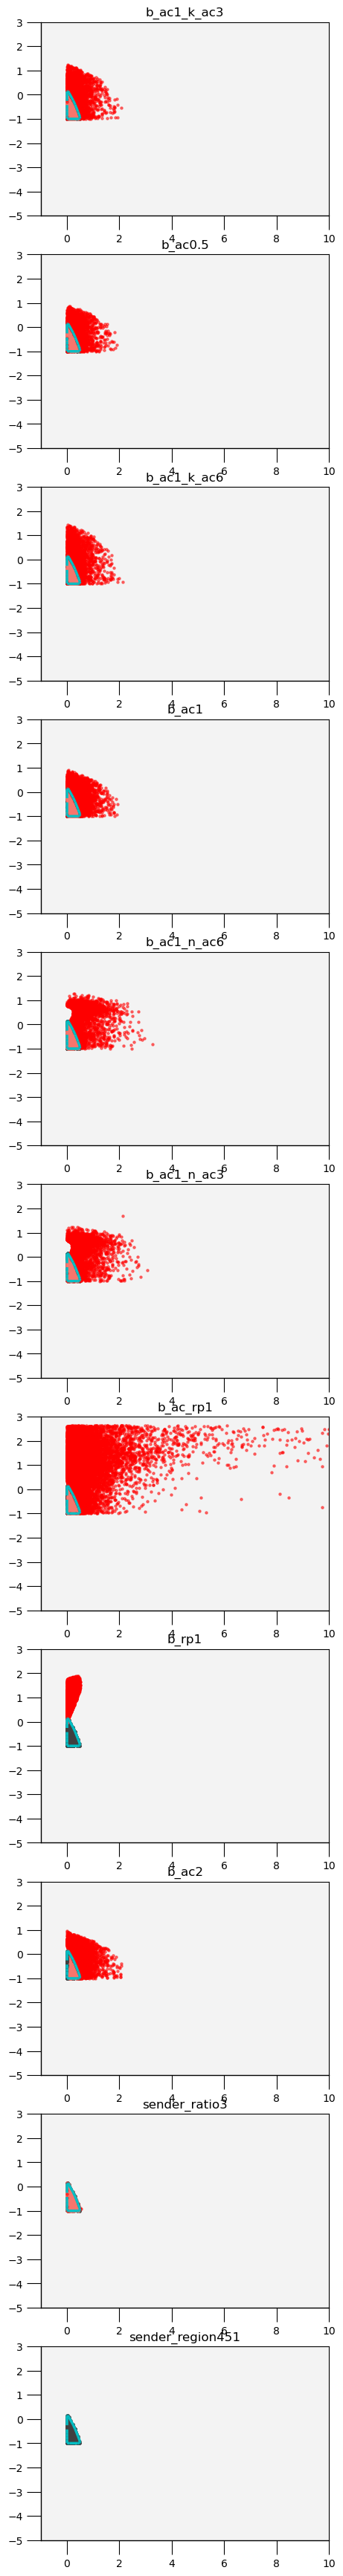

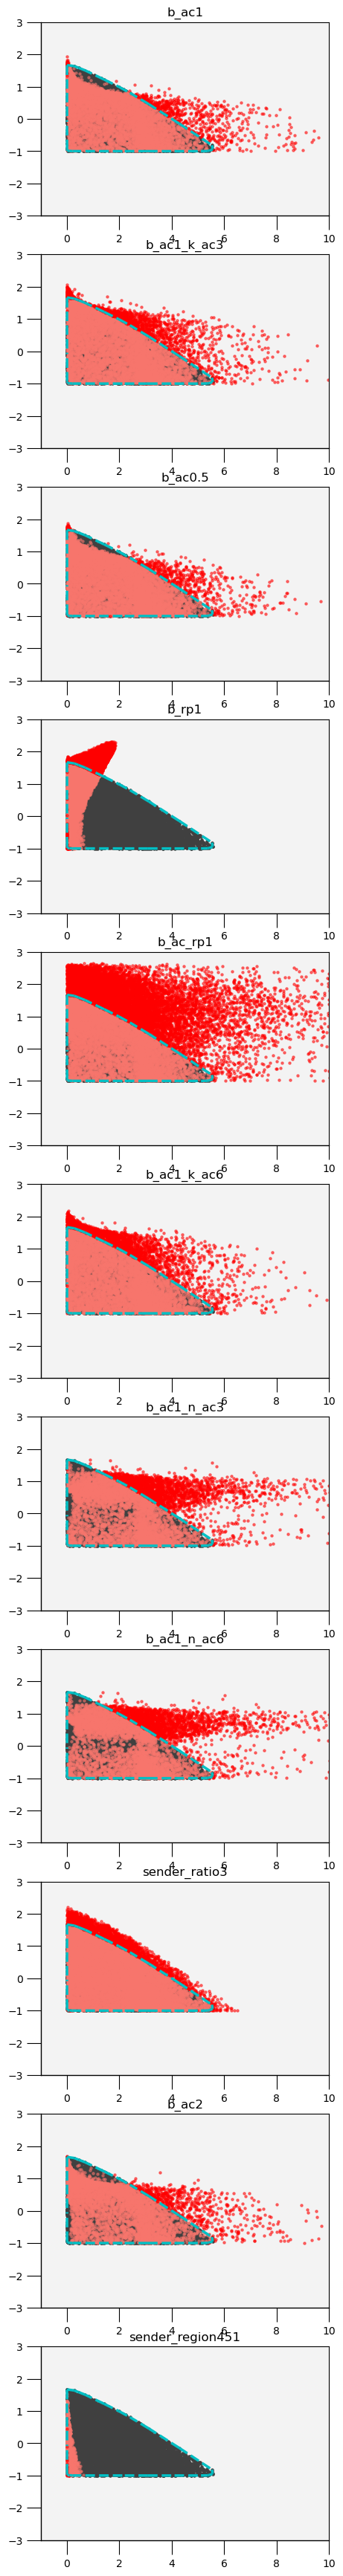

>>>>>>> remote


In [ ]:

ggcolors = {
    1: ["#F8766D"],
    2: ["#F8766D", "#00BFC4"],
    3: ["#F8766D", "#00BA38", "#619CFF"],
    4: ["#F8766D", "#7CAE00", "#00BFC4", "#C77CFF"],
    5: ["#F8766D", "#A3A500", "#00BF7D", "#00B0F6", "#E76BF3"],
    6: ["#F8766D", "#B79F00", "#00BA38", "#00BFC4", "#619CFF", "#F564E3"],
    7: ["#F8766D", "#C49A00", "#53B400", "#00C094", "#00B6EB", "#A58AFF", "#FB61D7"],
    8: ["#F8766D", "#CD9600", "#7CAE00", "#00BE67", "#00BFC4", "#00A9FF", "#C77CFF", "#FF61CC"],
}


# * analyze shifted points

# hull_data_fidelity_AC_log = np.array(
#     [heatmap_data_fidelity_log, heatmap_data_AC_log]
# ).T
# hull_data_fidelity_AC_log_feedback = np.array(
#     [heatmap_data_fidelity_log_feedback, heatmap_data_AC_log_feedback]
# ).T

# create convex hull object
hull = ConvexHull(
    np.array([
        simulations.get_fidelity_log(beta="baseline", subsets=["proofreading", "active", "valid"]),
        simulations.get_AC_log(beta="baseline", subsets=["proofreading", "active", "valid"]),
    ]).T
)


def in_hull(p, hull):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    from scipy.spatial import Delaunay
    if not isinstance(hull, Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p) >= 0


# calcualte which points (with feedback) is inside convex hull (without
# feedback) or not
for b in betas:
    simulations.add_subset(
        ("in_hull", b),
        in_hull(
            np.array([
                simulations.get_fidelity_log(beta=b),
                simulations.get_AC_log(beta=b)
            ]).T,
            hull.points
        )
    )


# plot
fig, axs = plt.subplots(len(betas) - 1, 1, figsize=(5, (len(betas) - 1) * 4))

for i, b in enumerate(betas[1:]):
    # scatter for beta==0 (no feedback)
    axs[i].scatter(
        simulations.get_fidelity_log(beta="baseline", subsets=["in_hull"]),
        simulations.get_AC_log(beta="baseline", subsets=["in_hull"]),
        5,
        color=[0.25, 0.25, 0.25],
        alpha=1
    )
    # draw convex hull
    for simplex in hull.simplices:
        axs[i].plot(
            simulations.get_fidelity_log(
                beta="baseline", subsets=["proofreading", "active"]
            )[simplex],
            simulations.get_AC_log(
                beta="baseline", subsets=["proofreading", "active"]
            )[simplex],
            "--",
            color=ggcolors[2][1],
            lw=2.5,
        )
    # scatter for inside hull
    axs[i].scatter(
        simulations.get_fidelity_log(beta=b, subsets=["in_hull"]),
        simulations.get_AC_log(beta=b, subsets=["in_hull"]),
        5,
        color=ggcolors[2][0],
        alpha=0.5,
    )
    # scatter for outside hull
    axs[i].scatter(
        simulations.get_fidelity_log(
            beta=b, subsets=["proofreading", "active"], not_subsets=["in_hull"]
        ),
        simulations.get_AC_log(
            beta=b, subsets=["proofreading", "active"], not_subsets=["in_hull"]
        ),
        5,
        color="red",
        alpha=0.5,
    )
    axs[i].title.set_text(b)

for ax in axs.flatten():
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # ax.plot([0, 25], [1.5, -11])

    ax.set_facecolor('#F3F3F3')
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1.0)

    ax.tick_params(axis="y", labelleft=True, size=14)
    ax.tick_params(axis="x", labelbottom=True, size=14)
    ax.tick_params(axis="y", labelleft=True, size=14)
    ax.tick_params(axis="x", labelbottom=True, size=14)

plt.savefig("convex_hall.svg", dpi=150)
plt.show()


In [ ]:
for b in betas:
    print(
        "beta: {}, inside triangle: {}, outside trignale: {}, total: {}"
        .format(
            b,
            len(
                simulations.get_AC(
                    beta=b,
                    subsets=["valid", "proofreading", "active", "in_hull"]
                )
            ),
            len(
                simulations.get_AC(
                    beta=b,
                    subsets=["valid", "proofreading", "active"],
                    not_subsets=["in_hull"]
                )
            ),
            len(
                simulations.get_AC(
                    beta=b, subsets=["valid", "proofreading", "active"]
                )
            )
        )
    )

<<<<<<< local


beta: baseline, inside triangle: 2125, outside trignale: 0, total: 2125
beta: b_ac1_k_ac3, inside triangle: 2408, outside trignale: 2694, total: 5102
beta: b_ac0.5, inside triangle: 2641, outside trignale: 2001, total: 4642
beta: b_ac1_k_ac6, inside triangle: 2262, outside trignale: 2358, total: 4620
beta: b_ac1, inside triangle: 2416, outside trignale: 2955, total: 5371
beta: b_ac1_n_ac6, inside triangle: 1001, outside trignale: 4142, total: 5143
beta: b_ac1_n_ac3, inside triangle: 1250, outside trignale: 4100, total: 5350
beta: b_ac_rp1, inside triangle: 2240, outside trignale: 14561, total: 16801
beta: b_rp1, inside triangle: 119, outside trignale: 6162, total: 6281
beta: b_ac2, inside triangle: 1120, outside trignale: 4000, total: 5120
beta: sender_ratio3, inside triangle: 2151, outside trignale: 12, total: 2163
beta: sender_region451, inside triangle: 0, outside trignale: 0, total: 0


beta: baseline, inside triangle: 11385, outside trignale: 0, total: 11385
beta: b_ac1, inside triangle: 7171, outside trignale: 638, total: 7809
beta: b_ac1_k_ac3, inside triangle: 7194, outside trignale: 1453, total: 8647
beta: b_ac0.5, inside triangle: 8644, outside trignale: 605, total: 9249
beta: b_rp1, inside triangle: 17988, outside trignale: 4600, total: 22588
beta: b_ac_rp1, inside triangle: 7602, outside trignale: 10181, total: 17783
beta: b_ac1_k_ac6, inside triangle: 7069, outside trignale: 2162, total: 9231
beta: b_ac1_n_ac3, inside triangle: 4703, outside trignale: 2089, total: 6792
beta: b_ac1_n_ac6, inside triangle: 4598, outside trignale: 2118, total: 6716
beta: sender_ratio3, inside triangle: 12423, outside trignale: 1651, total: 14074
beta: b_ac2, inside triangle: 5693, outside trignale: 633, total: 6326
beta: sender_region451, inside triangle: 1493, outside trignale: 26, total: 1519


>>>>>>> remote


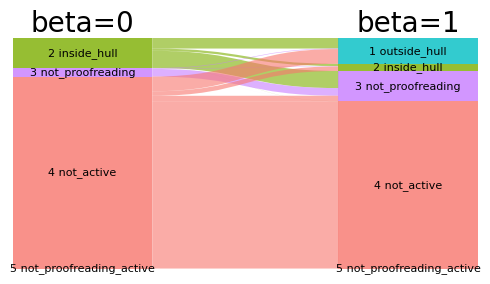

In [15]:
import sys

import sankey_mod
sys.path.append("./")



importlib.reload(sankey_mod)


sankey_raw = []


# Combine into a single array
group_names = [
    "1 outside_hull",
    "2 inside_hull",
    "3 not_proofreading",
    "4 not_active",
    "5 not_proofreading_active",
    "6 invalid",
]


def map_group_name(v):
    for name, boolean in zip(group_names, v):
        if boolean:
            return name

_betas = [0, 1]
for b in _betas:
    is_invalid = simulations.get_subset(
        subsets=None, not_subsets=[("valid", b)]
    )
    is_not_proofreading = simulations.get_subset(
        subsets=[("active", b)], not_subsets=[("proofreading", b)]
    )
    is_not_active = simulations.get_subset(
        subsets=[("proofreading", b)], not_subsets=[("active", b)]
    )
    is_not_proofreading_active = simulations.get_subset(
        subsets=[("valid", b)],
        not_subsets=[("proofreading", b), ("active", b)]
    )
    is_in_hull = simulations.get_subset(subsets=[("in_hull", b)])
    is_outside_hull = simulations.get_subset(
        subsets=[("proofreading", b), ("active", b)],
        not_subsets=[("in_hull", b)]
    )

    booleans = np.array([
        is_outside_hull,
        is_in_hull,
        is_not_proofreading,
        is_not_active,
        is_not_proofreading_active,
        is_invalid,
    ])

    sankey_raw.append(
        list(map(map_group_name, booleans.T))
    )

sankey_raw = np.array(sankey_raw)

sankey_table = {}

for sim in sankey_raw.T:
    if None in sim or "6 invalid" in sim:
        continue
    if tuple(sim) not in sankey_table:
        sankey_table[tuple(sim)] = 1
    else:
        sankey_table[tuple(sim)] += 1

# remove all zero-weight
keys = list(sankey_table.keys())
for i, k in enumerate(keys):
    if sankey_table[k] == 0:
        sankey_table.pop(k)



plt.figure(figsize=(6, 3))
sankey_mod.sankey(
    pd.DataFrame(
        [[sankey_table[k]] + list(k) for k in sankey_table],
        columns=["Weight"] + ["beta={}".format(b) for b in _betas],
    ),
    # since we have only one not proofreading & not active, just assign white for it
    nodes_color=ggcolors[4] + ["#FFFFFF"],
    labels_size=8,
    sort_flows_by_nodes=True
)
plt.savefig("sankey_full.svg")
plt.show()

<<<<<<< local


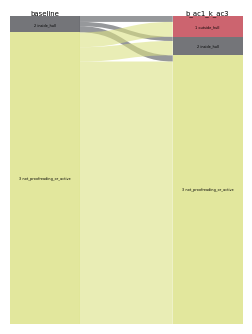

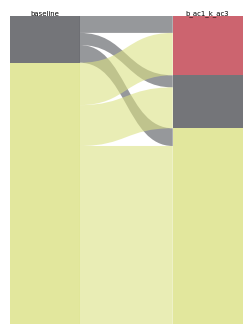

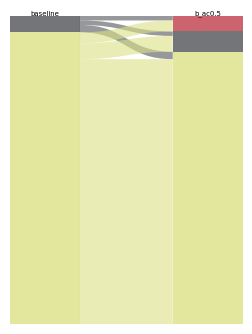

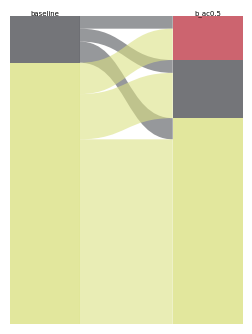

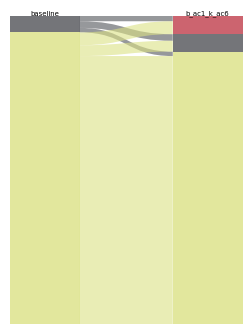

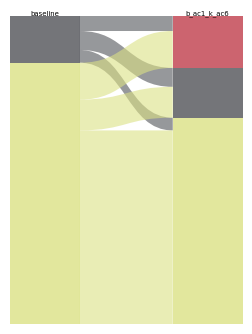

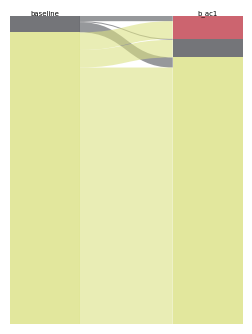

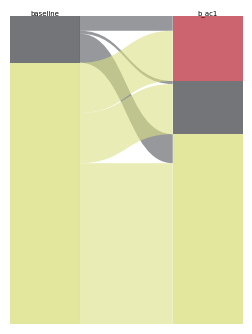

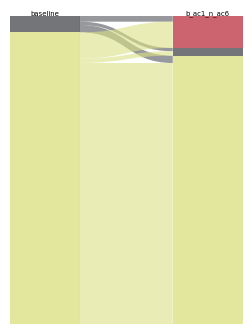

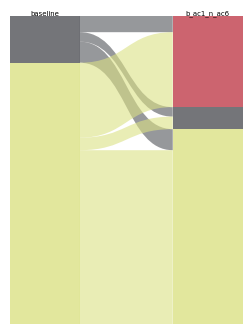

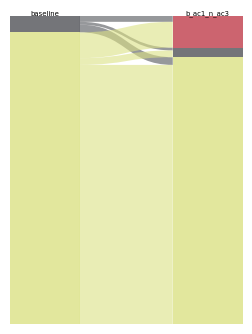

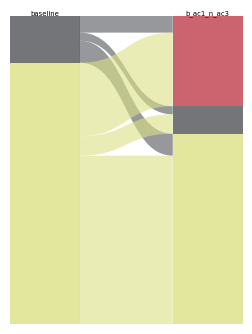

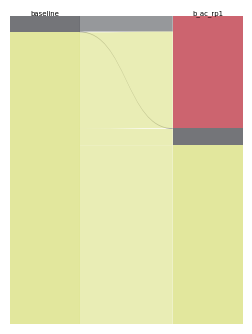

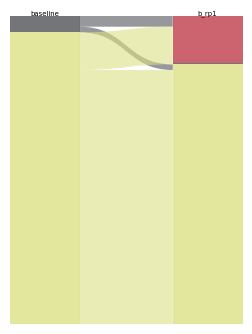

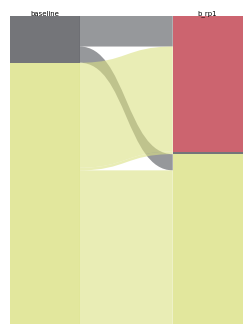

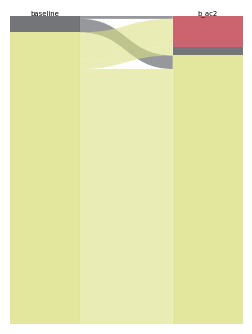

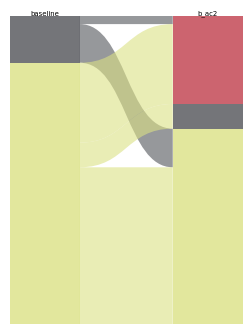

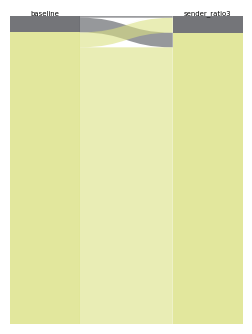

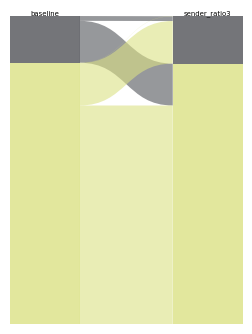

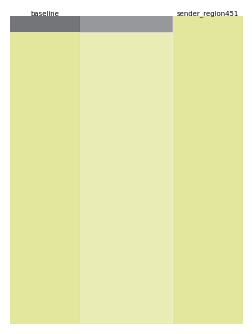

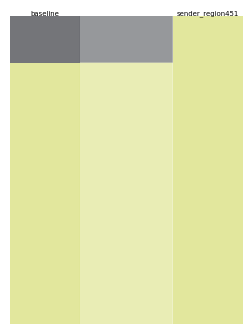

['baseline', 'b_ac1', 'b_ac_rp1']
baseline b_ac1 {('2 inside_hull', '2 inside_hull'): 4272, ('2 inside_hull', '3 not_proofreading_or_active'): 6998, ('3 not_proofreading_or_active', '3 not_proofreading_or_active'): 24916, ('3 not_proofreading_or_active', '2 inside_hull'): 2896, ('3 not_proofreading_or_active', '1 outside_hull'): 524, ('2 inside_hull', '1 outside_hull'): 114}


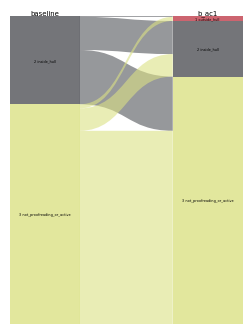

baseline b_ac_rp1 {('2 inside_hull', '1 outside_hull'): 6743, ('2 inside_hull', '2 inside_hull'): 4501, ('3 not_proofreading_or_active', '3 not_proofreading_or_active'): 21792, ('3 not_proofreading_or_active', '2 inside_hull'): 3101, ('3 not_proofreading_or_active', '1 outside_hull'): 3437, ('2 inside_hull', '3 not_proofreading_or_active'): 141}


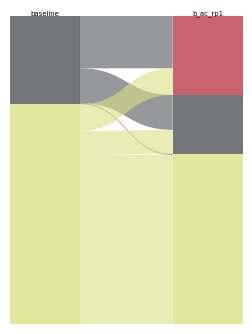

>>>>>>> remote


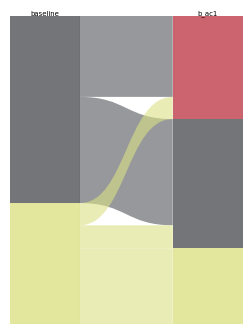

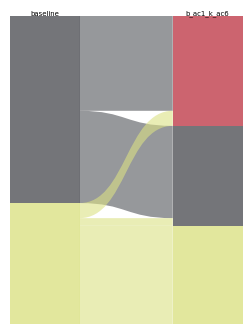

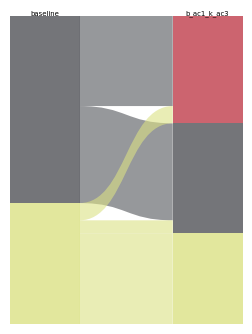

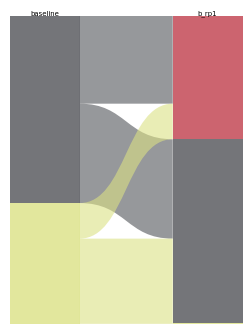

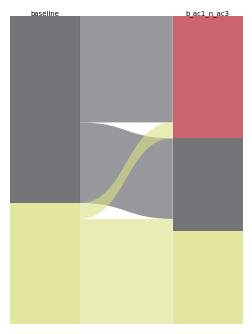

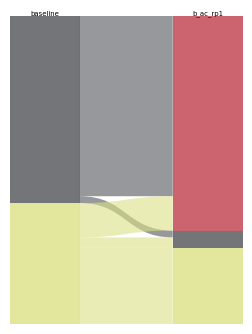

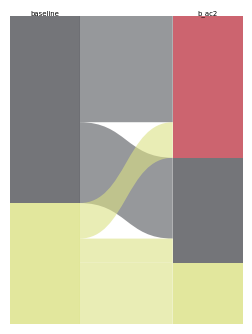

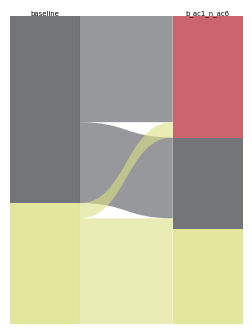

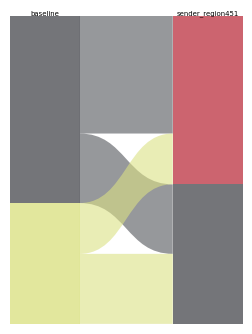

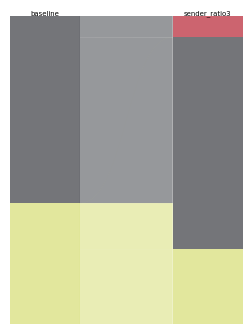

In [ ]:
import importlib
import sys

import sankey_mod
sys.path.append("./")


importlib.reload(sankey_mod)


sankey_raw = []


# Combine into a single array
group_names = [
    "1 outside_hull",
    "2 inside_hull",
    "3 not_proofreading_or_active",
    "4 invalid",
]


def map_group_name(v):
    for name, boolean in zip(group_names, v):
        if boolean:
            return name


for b in betas:
    is_invalid = simulations.get_subset(
        subsets=None, not_subsets=[("valid", b)]
    )
    is_not_proofreading = simulations.get_subset(
        subsets=[("valid", b)],
        not_subsets=[("proofreading", b)]
    )
    is_not_active = simulations.get_subset(
        subsets=[("valid", b)],
        not_subsets=[("active", b)]
    )
    is_in_hull = simulations.get_subset(subsets=[("in_hull", b)])
    is_outside_hull = simulations.get_subset(
        subsets=[("proofreading", b), ("active", b)],
        not_subsets=[("in_hull", b)]
    )

    booleans = np.array([
        is_outside_hull,
        is_in_hull,
        np.bitwise_or(is_not_proofreading, is_not_active),
        is_invalid,
    ])

    sankey_raw.append(
        list(map(map_group_name, booleans.T))
    )

sankey_raw = np.array(sankey_raw)

zoomin_size = 14000
b0 = betas[0]
print(betas)
for i, b1 in enumerate(betas[1:]):
    # b1 = beta_dict[b1]
    sankey_raw_subset = sankey_raw[[0, i + 1], :]
    sankey_table = {}

    for sim in sankey_raw_subset.T:
        if None in sim or "4 invalid" in sim:
            continue
        if tuple(sim) not in sankey_table:
            sankey_table[tuple(sim)] = 1
        else:
            sankey_table[tuple(sim)] += 1

    # remove all zero-weight
    keys = list(sankey_table.keys())
    for k in keys:
        if sankey_table[k] == 0:
            sankey_table.pop(k)

    # remove color of outside .. if having no that value
    sankey_colors = ["#515358", "#dbe185"]
    keys = list(sankey_table)
    for k in keys:
        if k[1] == "1 outside_hull":
            sankey_colors = ["#515358", "#c03d4b", "#dbe185"]
            break

    print( b0, b1, sankey_table)

    plt.figure(figsize=(3, 4))
    sankey_mod.sankey(
        pd.DataFrame(
            [[sankey_table[k]] + list(k) for k in sorted(sankey_table)],
            columns=["Weight"] + [b0, b1],
        ),
        nodes_color=sankey_colors,
        sort_flows_by_nodes=True,
        labels_size=2.5,
        titles_size=5,
        labels_color="black" if i == 0 else None,
    )
    plt.savefig("sankey_merged_{} to {}.svg".format(b0, b1))
    plt.show()

    sim_count = 0
    for k in sankey_table:
        if k != ('3 not_proofreading_or_active', '3 not_proofreading_or_active'):
            sim_count += sankey_table[k]

    # skip zoom if got minus weight
    if zoomin_size < sim_count:
        continue
    sankey_table[
        ('3 not_proofreading_or_active', '3 not_proofreading_or_active')
    ] = zoomin_size - sim_count

    plt.figure(figsize=(3, 4))
    sankey_mod.sankey(
        pd.DataFrame(
            [[sankey_table[k]] + list(k) for k in sorted(sankey_table)],
            columns=["Weight"] + [b0, b1],
        ),
        nodes_color=sankey_colors,
        sort_flows_by_nodes=True,
        labels_size=2.5,
        titles_size=5,
        # labels_color="black" if i == 0 else None,
        labels_color=None if i == 0 else None,
    )

    plt.savefig("sankey_merged_zoom_{} to {}.svg".format(b0, b1))
    plt.show()

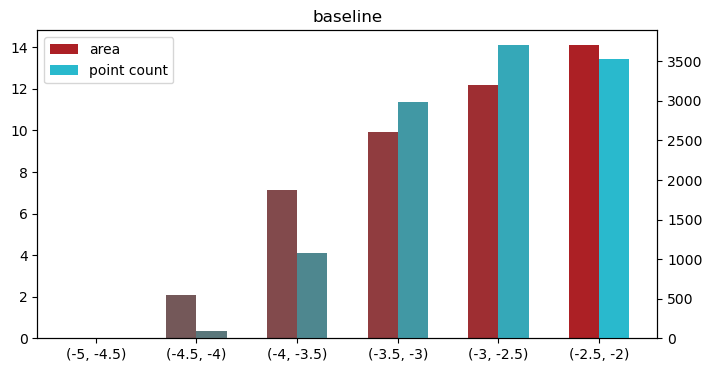

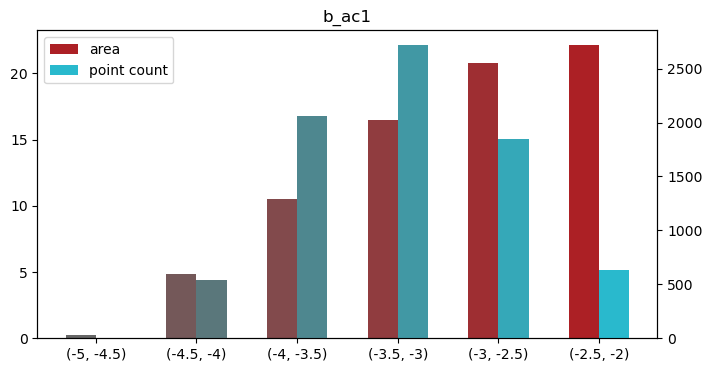

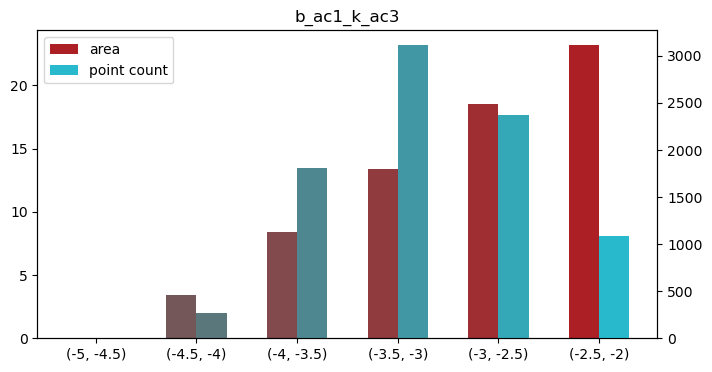

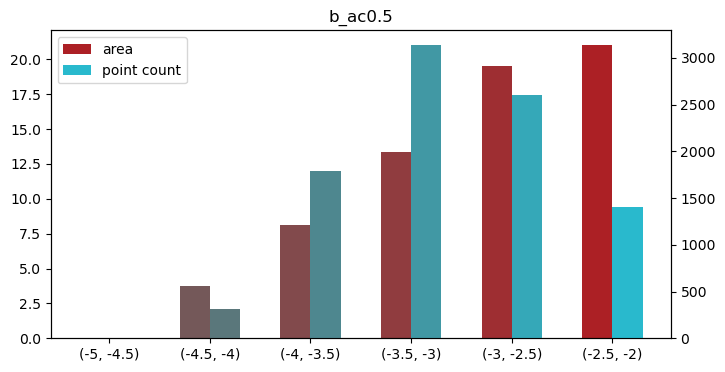

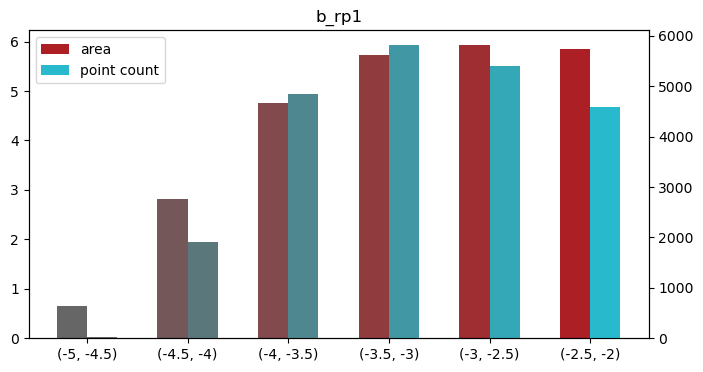

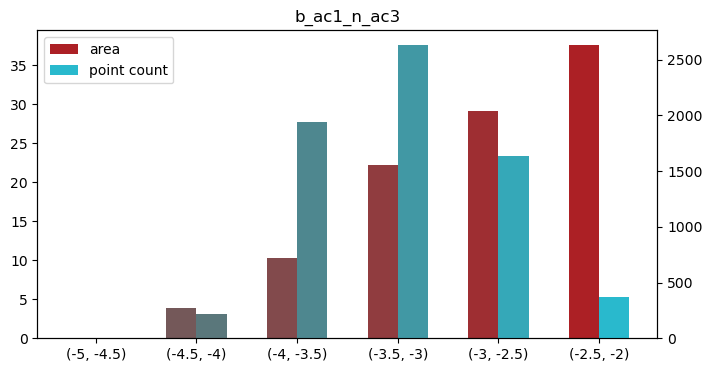

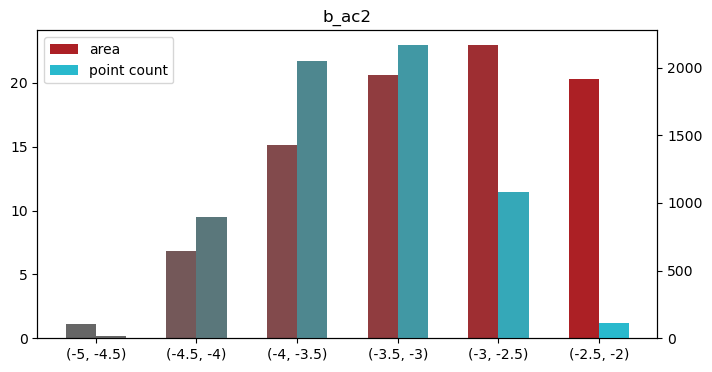

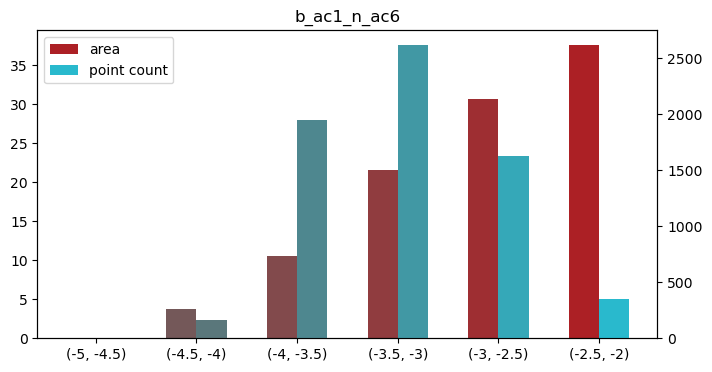

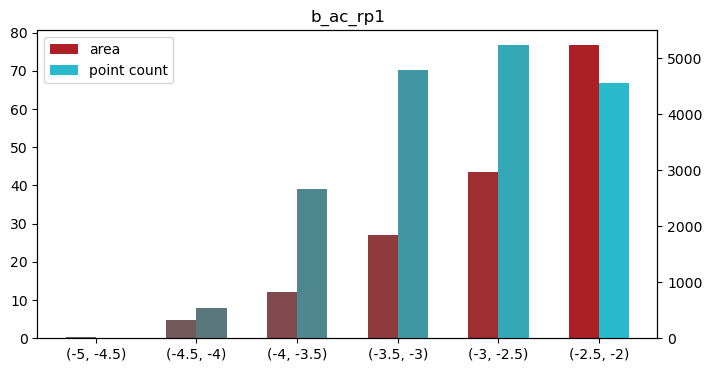

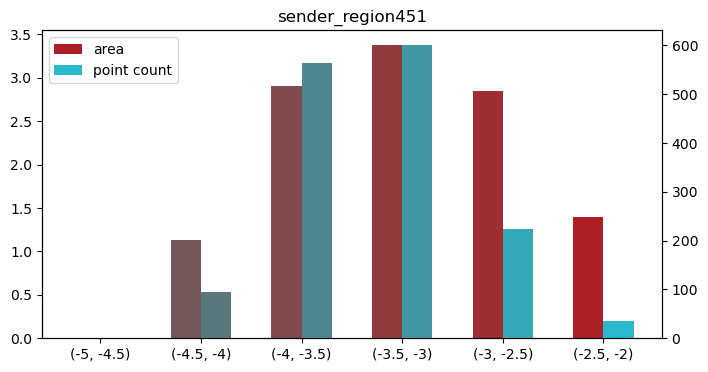

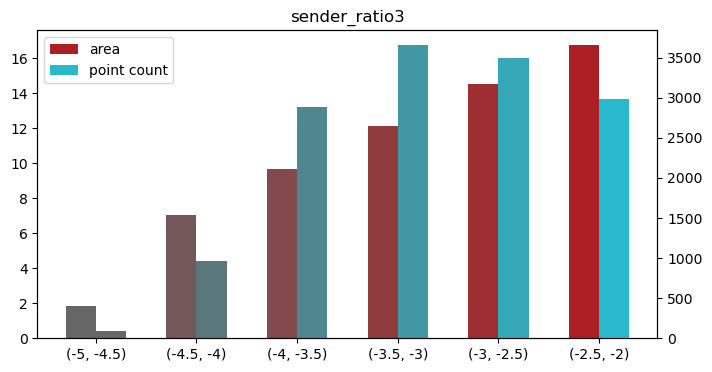

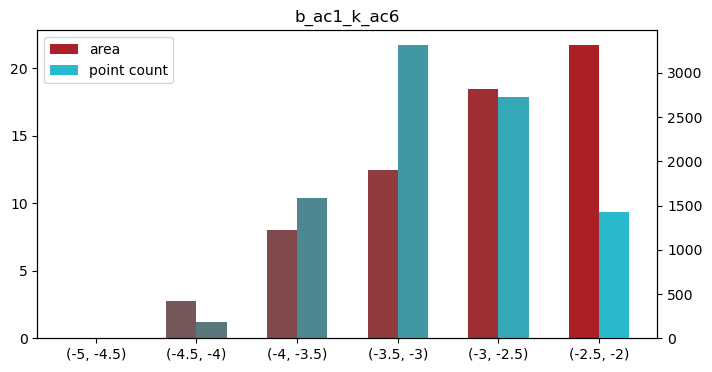

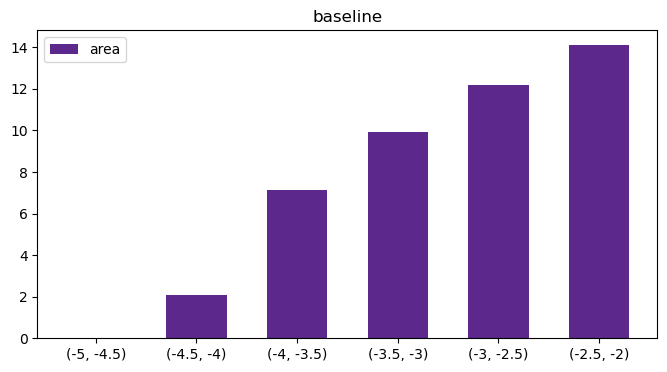

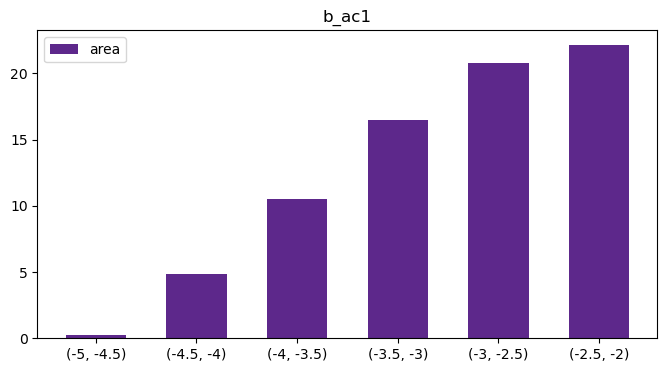

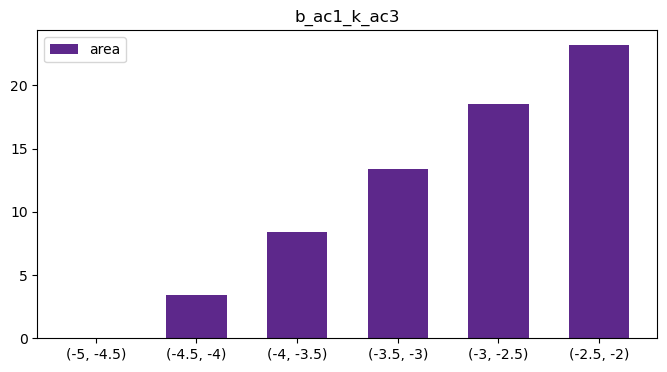

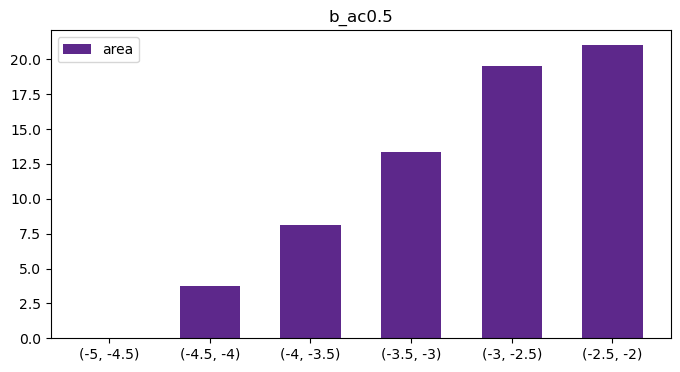

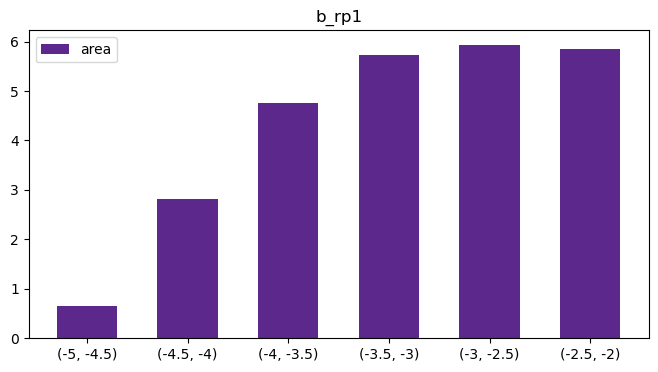

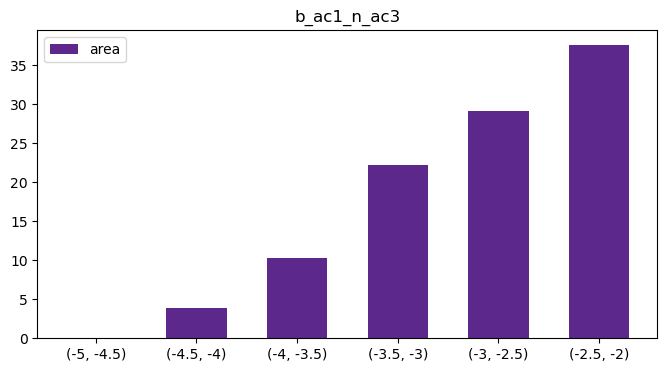

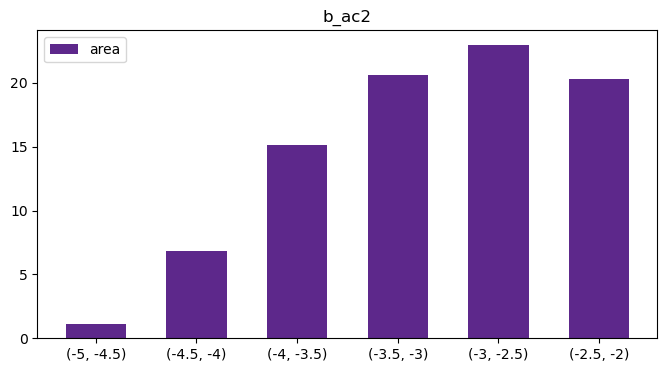

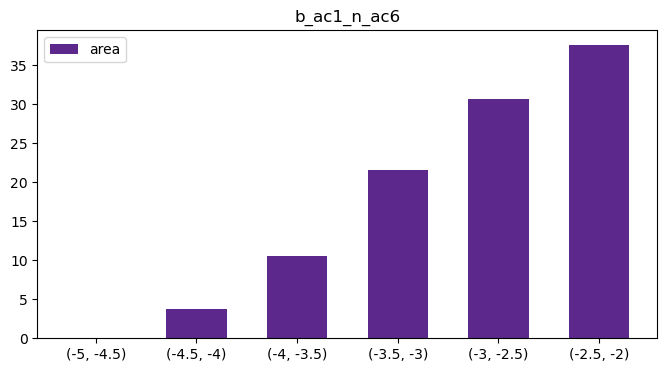

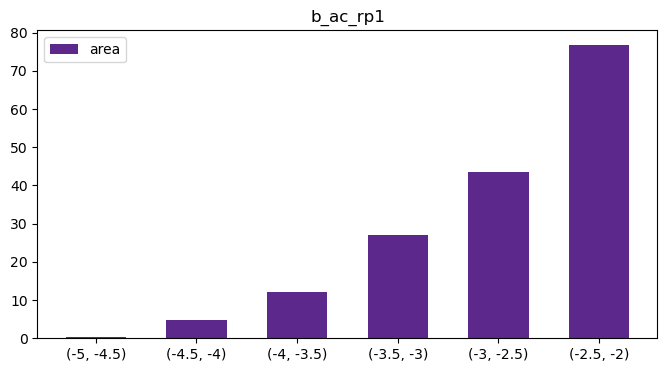

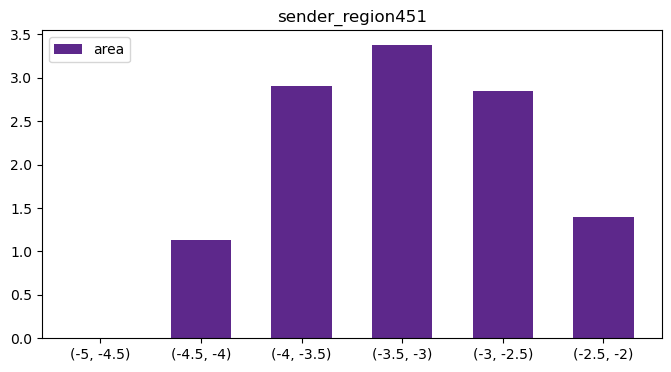

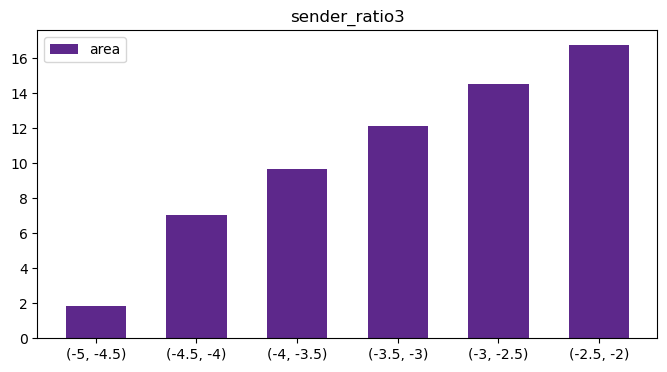

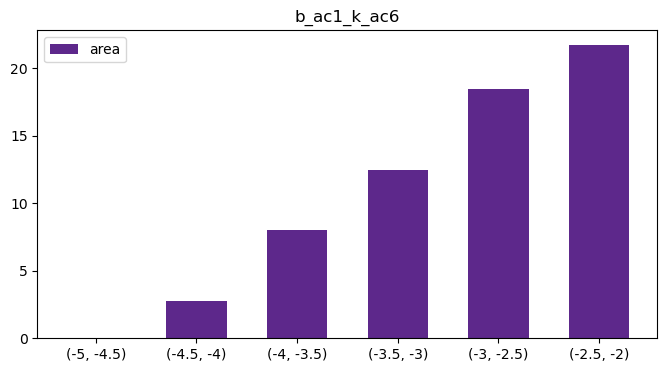

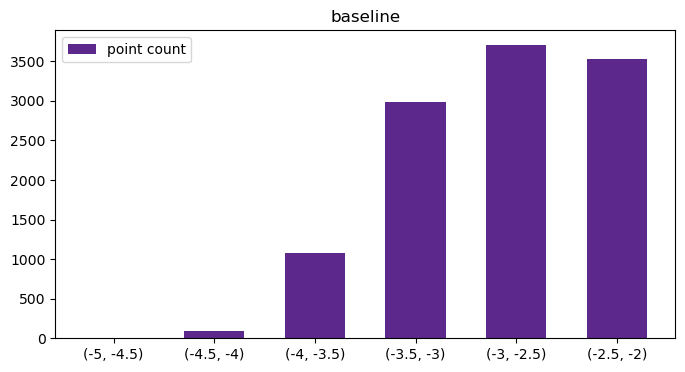

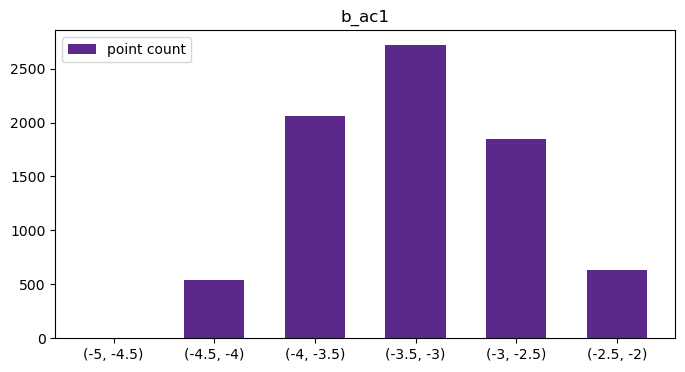

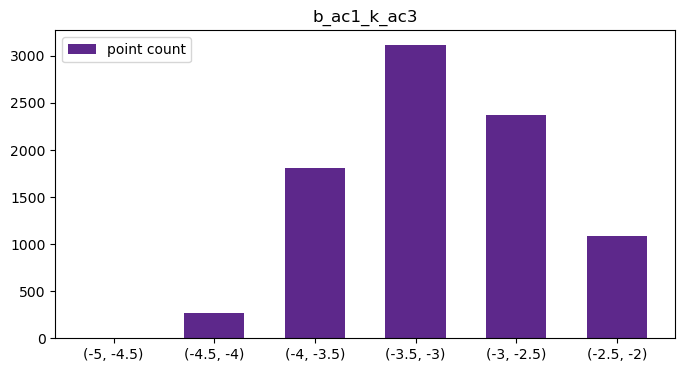

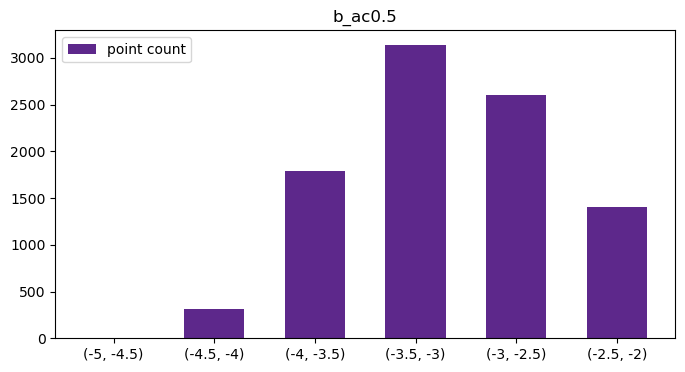

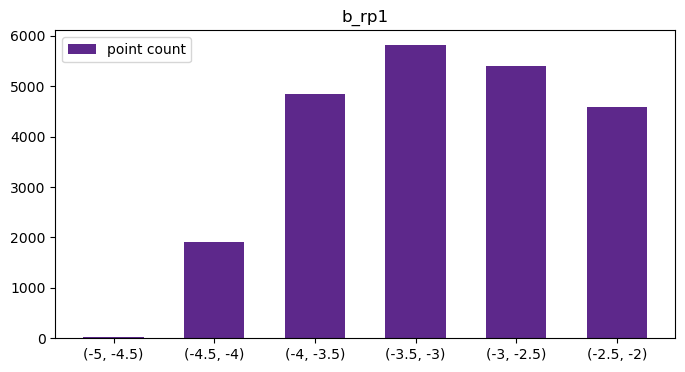

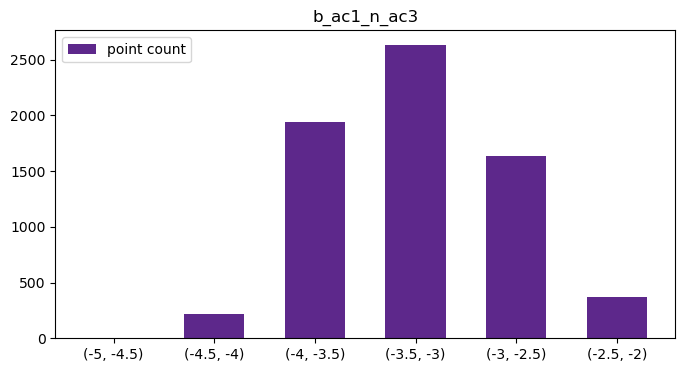

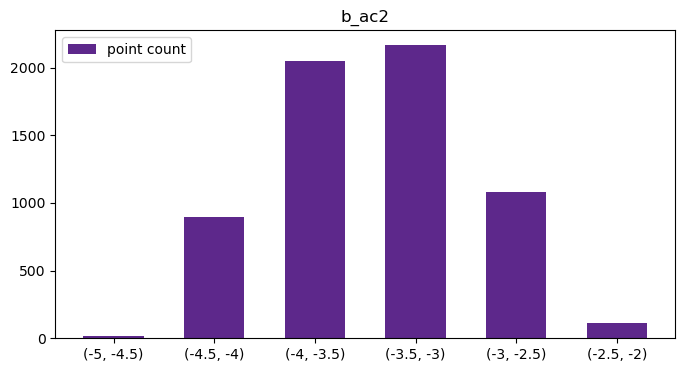

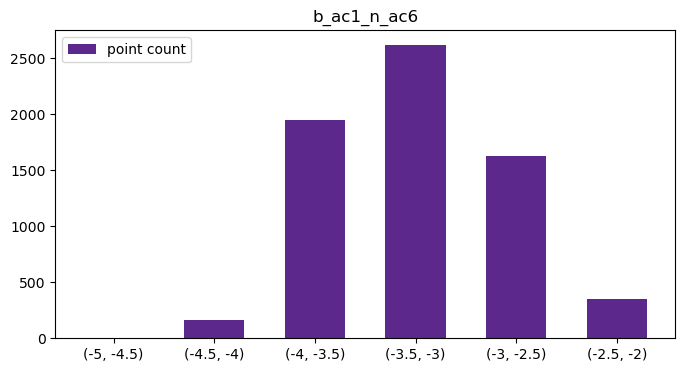

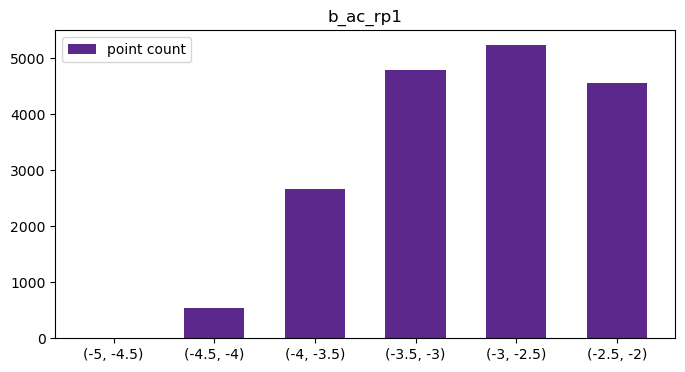

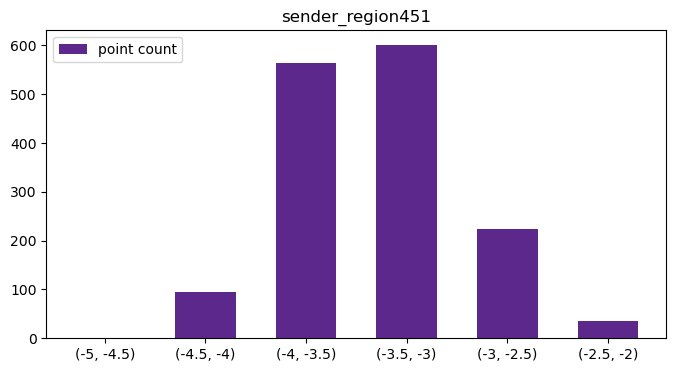

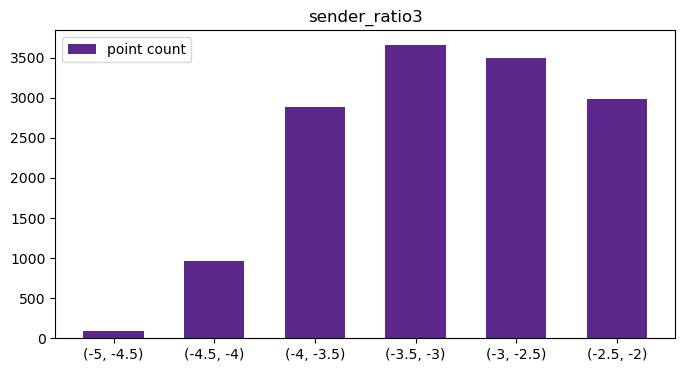

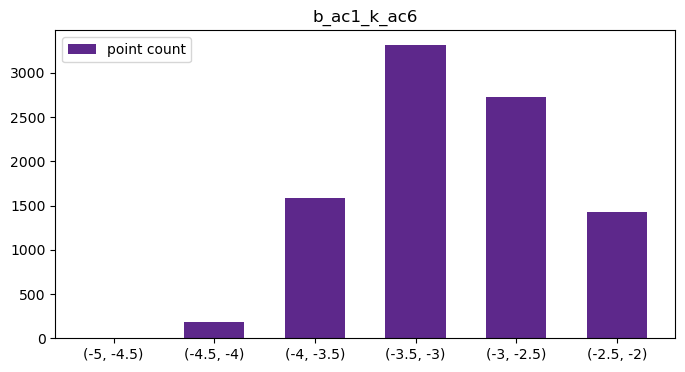

In [37]:
# Somehow J_complex is important??? A paragraph about it here please.
# Should be explicitly, higher J_complex the better (in terms of area of
# the triangle?)

j_complex_range = [
    (-5, -4.5),
    (-4.5, -4),
    (-4, -3.5),
    (-3.5, -3),
    (-3, -2.5),
    (-2.5, -2),
]

j_As = simulations.get_parameters()[:, 1]
for r in j_complex_range:
    range_subset = np.bitwise_and(j_As >= 10**r[0], j_As <= 10**r[1])
    for b in betas:
        simulations.add_subset(
            ("j_complex_{}_{}".format(r[0], r[1]), b), range_subset
        )

bar_width = 0.3
# #666666 to #AC2025 gradient
colors1 = np.array([
    np.arange(102, 173, 14) / 255,
    np.arange(102, 31, -14) / 255,
    np.arange(102, 36, -13) / 255,
]).T
# #666666 to #29B9CD gradient
colors2 = np.array([
    np.arange(102, 40, -12.2) / 255,
    np.arange(102, 186, 16.6) / 255,
    np.arange(102, 206, 20.6) / 255,
]).T
for i, b in enumerate(betas):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    areas = []
    point_count = []
    for r in j_complex_range:
        points = np.array([
            simulations.get_fidelity_log(
                beta=b,
                subsets=[
                    "proofreading",
                    "active",
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1])
                ]
            ),
            simulations.get_AC_log(
                beta=b,
                subsets=[
                    "proofreading",
                    "active",
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1])
                ]
            ),
        ]).T

        point_count.append(points.shape[0])
        # if there are too few points to construct a convex hull (minimal a triangle)
        # then set area as 0 and continue
        if points.shape[0] < 3:
            areas.append(0)
            continue

        hull = ConvexHull(points)
        areas.append(hull.area)

    # use np.flip to correct legend color
    ax.bar(
        np.flip(np.arange(len(j_complex_range)) - bar_width / 2),
        np.flip(areas),
        bar_width,
        label="area",
        color=np.flip(colors1, 0),
    )
    ax2 = ax.twinx()
    ax2.bar(
        np.flip(np.arange(len(j_complex_range)) + bar_width / 2),
        np.flip(point_count),
        bar_width,
        label="point count",
        color=np.flip(colors2, 0)
    )

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc="upper left")

    ax.title.set_text(b)
    ax.set_xticks(
        np.arange(len(j_complex_range)),
        list(map(lambda r: "({}, {})".format(r[0], r[1]), j_complex_range))
    )

    plt.savefig(branchname + " " + b + "_area_point_vs_j_complex.svg")
    plt.show()


bar_width = 0.6
for i, b in enumerate(betas):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    areas = []
    point_count = []
    for r in j_complex_range:
        points = np.array([
            simulations.get_fidelity_log(
                beta=b,
                subsets=[
                    "proofreading",
                    "active",
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1])
                ]
            ),
            simulations.get_AC_log(
                beta=b,
                subsets=[
                    "proofreading",
                    "active",
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1])
                ]
            ),
        ]).T

        point_count.append(points.shape[0])
        # if there are too few points to construct a convex hull (minimal a triangle)
        # then set area as 0 and continue
        if points.shape[0] < 3:
            areas.append(0)
            continue

        hull = ConvexHull(points)
        areas.append(hull.area)

    ax.bar(
        np.arange(len(j_complex_range)),
        areas,
        bar_width,
        label="area",
        color="#5D288B"
    )

    ax.legend(loc="upper left")

    ax.title.set_text(b)
    ax.set_xticks(
        np.arange(len(j_complex_range)),
        list(map(lambda r: "({}, {})".format(r[0], r[1]), j_complex_range))
    )

    plt.savefig(branchname + " " + b + "_area_vs_j_complex.svg")
    plt.show()

bar_width = 0.6
for i, b in enumerate(betas):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    areas = []
    point_count = []
    for r in j_complex_range:
        points = np.array([
            simulations.get_fidelity_log(
                beta=b,
                subsets=[
                    "proofreading",
                    "active",
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1])
                ]
            ),
            simulations.get_AC_log(
                beta=b,
                subsets=[
                    "proofreading",
                    "active",
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1])
                ]
            ),
        ]).T

        point_count.append(points.shape[0])
        # if there are too few points to construct a convex hull (minimal a triangle)
        # then set area as 0 and continue
        if points.shape[0] < 3:
            areas.append(0)
            continue

        # hull = ConvexHull(points)
        # areas.append(hull.area)

    ax.bar(
        np.arange(len(j_complex_range)),
        point_count,
        bar_width,
        label="point count",
        color="#5D288B"
    )

    ax.legend(loc="upper left")

    ax.title.set_text(b)
    ax.set_xticks(
        np.arange(len(j_complex_range)),
        list(map(lambda r: "({}, {})".format(r[0], r[1]), j_complex_range))
    )

    plt.savefig(branchname + " " + b + "_point_count_vs_j_complex.svg")
    plt.show()

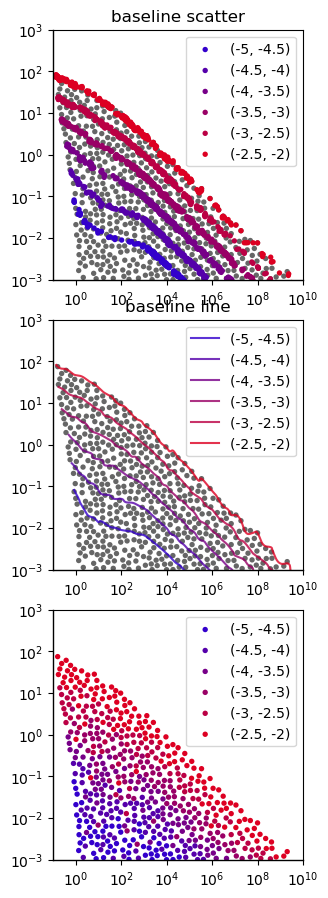

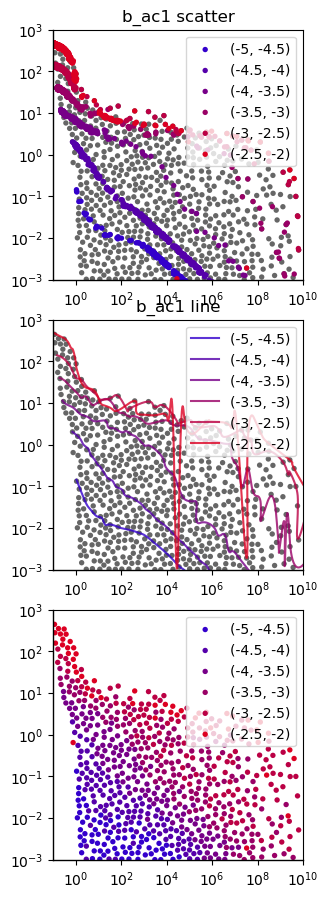

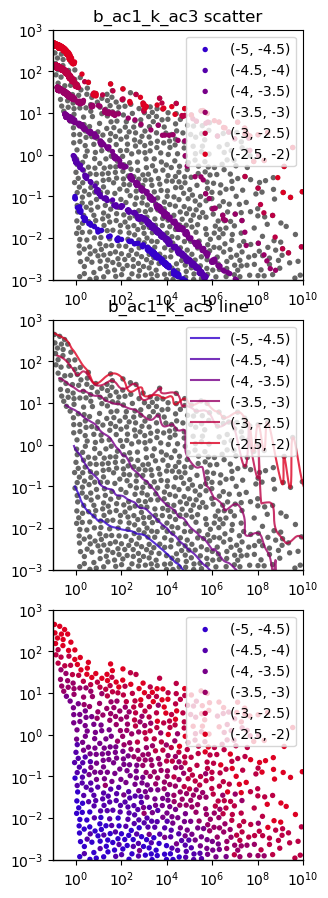

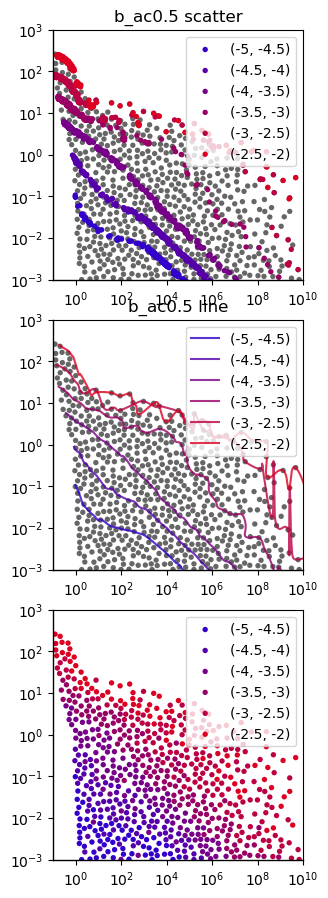

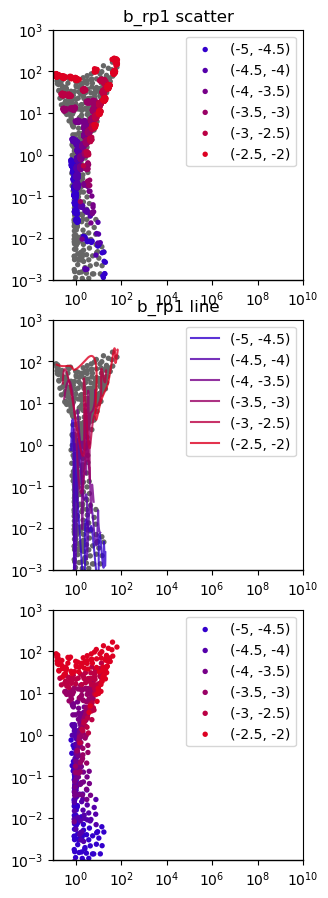

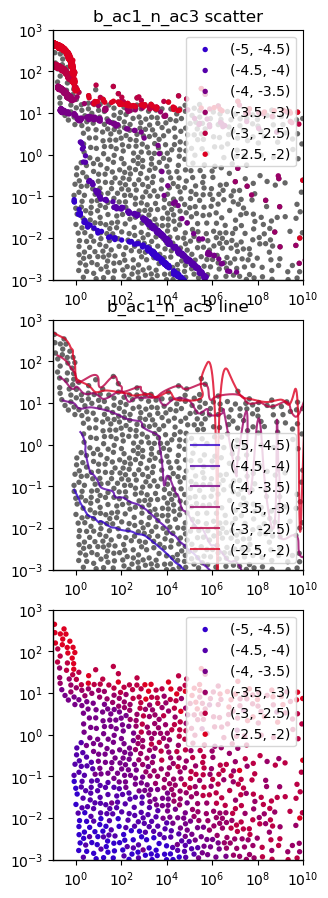

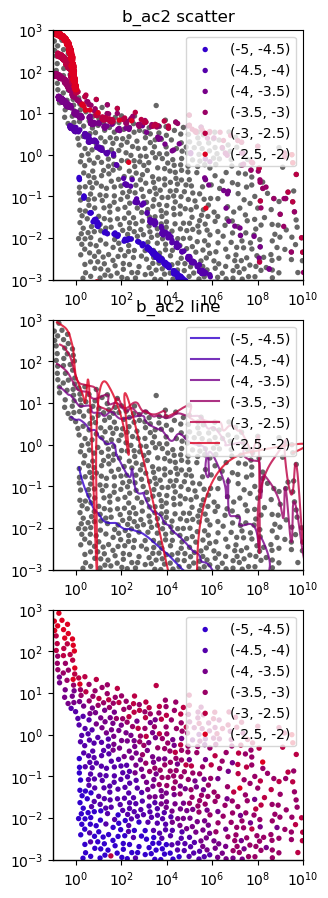

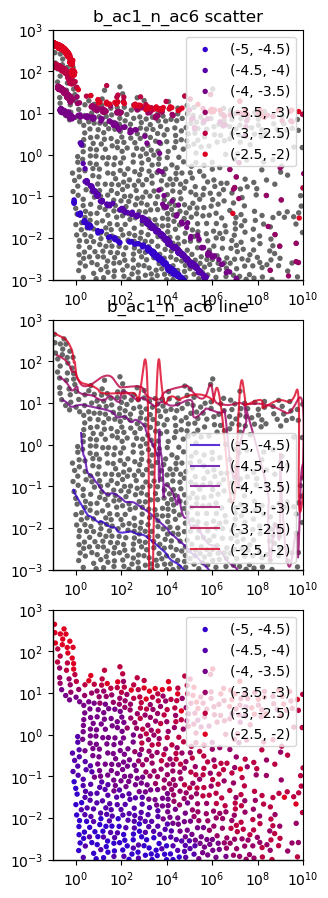

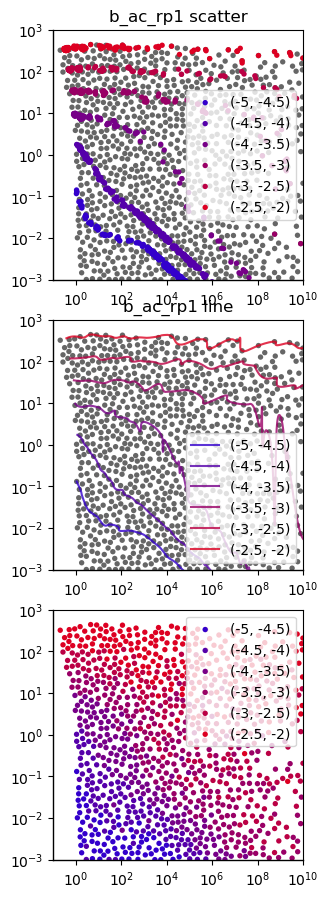

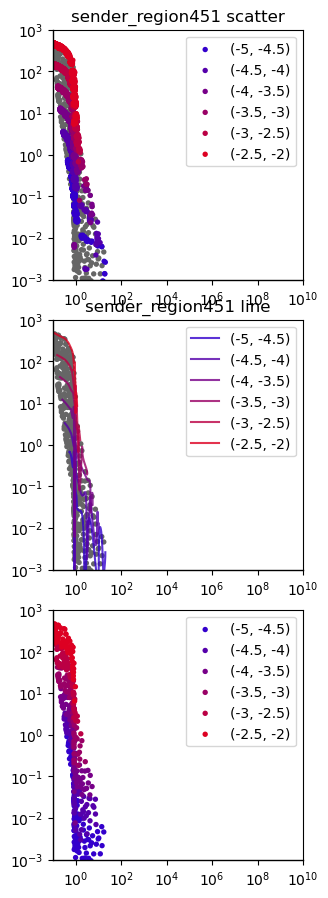

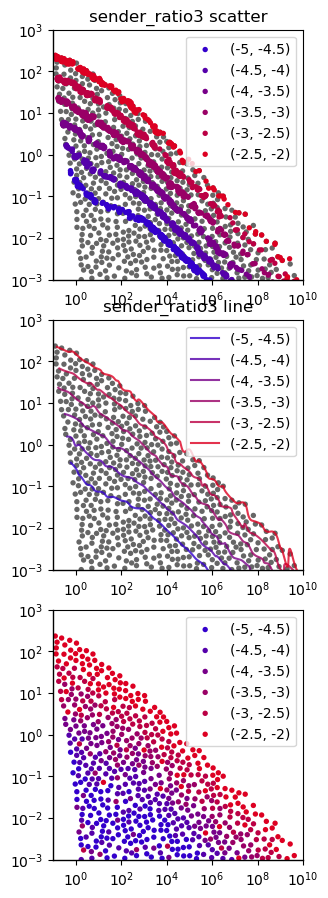

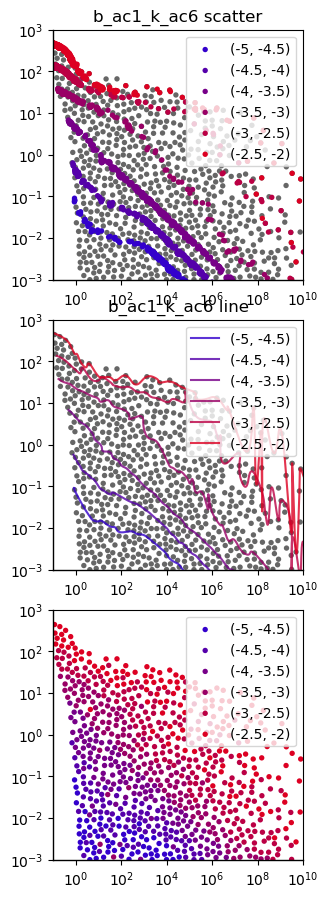

In [35]:
from scipy.interpolate import make_interp_spline, BSpline


# this width is relative width/height
# e.g. the distance between cornors is 1.0
boundary_width = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
distance_threshold = 1e-5
error_rate_betas = [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1]
for i, beta in enumerate(betas):
    fig, axs = plt.subplots(3, 1, figsize=(5, 12))
    axs[0].scatter(
        simulations.get_fidelity_log(
            beta=beta, subsets=["simplified"]
        ),
        simulations.get_AC_log(
            beta=beta, subsets=["simplified"]
        ),
        15,
        color=[0.4, 0.4, 0.4],
        alpha=1,
        edgecolor="none",
    )
    axs[1].scatter(
        simulations.get_fidelity_log(
            beta=beta, subsets=["simplified"]
        ),
        simulations.get_AC_log(
            beta=beta, subsets=["simplified"]
        ),
        15,
        color=[0.4, 0.4, 0.4],
        alpha=1,
        edgecolor="none",
    )
    for j, r in enumerate(j_complex_range):
        axs[2].scatter(
            simulations.get_fidelity_log(
                beta=beta, 
                subsets=[
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1]),
                    "simplified"
                ]
            ),
            simulations.get_AC_log(
                beta=beta,
                subsets=[
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1]),
                    "simplified"
                ]
            ),
            15,
            color=[
                j / len(j_complex_range) / 5 * 4 + 0.2,
                0,
                1 - j / len(j_complex_range) / 5 * 4 - 0.2
            ],
            alpha=1,
            edgecolor="none",
            label="({}, {})".format(r[0], r[1]),
        )
    for j, r in enumerate(j_complex_range):
        boundary_step = 0.2

        # find the trade-off boundary
        boundary_f = []
        boundary_a = []

        k = (ylim[1] - ylim[0]) / (xlim[1] - xlim[0])

        for b in np.arange(2 * ylim[0] - ylim[1], ylim[1] + 1, boundary_step):
            f = simulations.get_fidelity_log(
                beta=beta,
                subsets=[
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1])
                ]
            )
            a = simulations.get_AC_log(
                beta=beta,
                subsets=[
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1])
                ]
            )
            # filter only points near line
            indices = (-k * f + a - b) ** 2 < boundary_step / 4
            if np.count_nonzero(indices) == 0:
                continue
            f = f[indices]
            a = a[indices]
            # find which point is the most top right one (farest along slop k)
            # get rid of abnormal points
            distance = a + f / k
            sort_indices = np.argsort(distance)
            if i < 6 or len(sort_indices) < 3:
                max_i = sort_indices[-1]
            elif distance[sort_indices[-1]] - distance[sort_indices[-2]] > \
                    2 * (distance[sort_indices[-2]] - distance[sort_indices[-3]]):
                max_i = sort_indices[-2]
            else:
                max_i = sort_indices[-1]
            boundary_f.append(f[max_i])
            boundary_a.append(a[max_i])
        boundary_f, boundary_a = np.unique([boundary_f, boundary_a], axis=1)
        # find all point near the boundary
        f_plot = []
        a_plot = []
        for f, a in zip(
            simulations.get_fidelity_log(
                beta=beta,
                subsets=[
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1])
                ]
            ),
            simulations.get_AC_log(
                beta=beta,
                subsets=[
                    "valid",
                    "j_complex_{}_{}".format(r[0], r[1])
                ]
            ),
        ):
            if np.any(
                ((boundary_f - f) / (xlim[1] - xlim[0])) ** 2 +
                    ((boundary_a - a) / (ylim[1] - ylim[0])) ** 2 < boundary_width[0] ** 2
            ) and not np.any(
                ((f_plot - f) / (xlim[1] - xlim[0])) ** 2 +
                    ((a_plot - a) / (ylim[1] - ylim[0])) ** 2 < distance_threshold ** 2
            ):
                f_plot.append(f)
                a_plot.append(a)
        axs[0].scatter(
            f_plot, a_plot,
            15,
            color=[
                j / len(j_complex_range) / 5 * 4 + 0.2,
                0,
                1 - j / len(j_complex_range) / 5 * 4 - 0.2
            ],
            alpha=1,
            edgecolor="none",
            label="({}, {})".format(r[0], r[1]),
        )

        # plot smooth line
        # this is not perfect, just as a temporary solution
        # boundary_f = np.array(boundary_f)
        # boundary_a = np.array(boundary_a)
        param = np.linspace(0, 1, boundary_f.size)

        spl = make_interp_spline(
            param,
            np.c_[
                boundary_f,
                boundary_a
            ],
            k=2
        )  # type: BSpline
        f_new, a_smooth = spl(np.linspace(0, 1, boundary_f.size * 100)).T
        axs[1].plot(
            f_new, a_smooth,
            15,
            color=(
                j / len(j_complex_range) / 5 * 4 + 0.2,
                0.0,
                1 - j / len(j_complex_range) / 5 * 4 - 0.2
            ),
            alpha=0.8,
            label="({}, {})".format(r[0], r[1])
        )

    axs[0].legend()
    # somehow line plot have duplicated legend, a workaround to avoid this
    handles, labels = axs[1].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[1].legend(by_label.values(), by_label.keys())
    axs[2].legend()
    axs[0].title.set_text(betas[i] + " scatter")
    axs[1].title.set_text(betas[i] + " line")

    format_subplots(fig, axs)

    plt.savefig(branchname + " " + beta + "_j_complex_boundary.svg")
    plt.show()

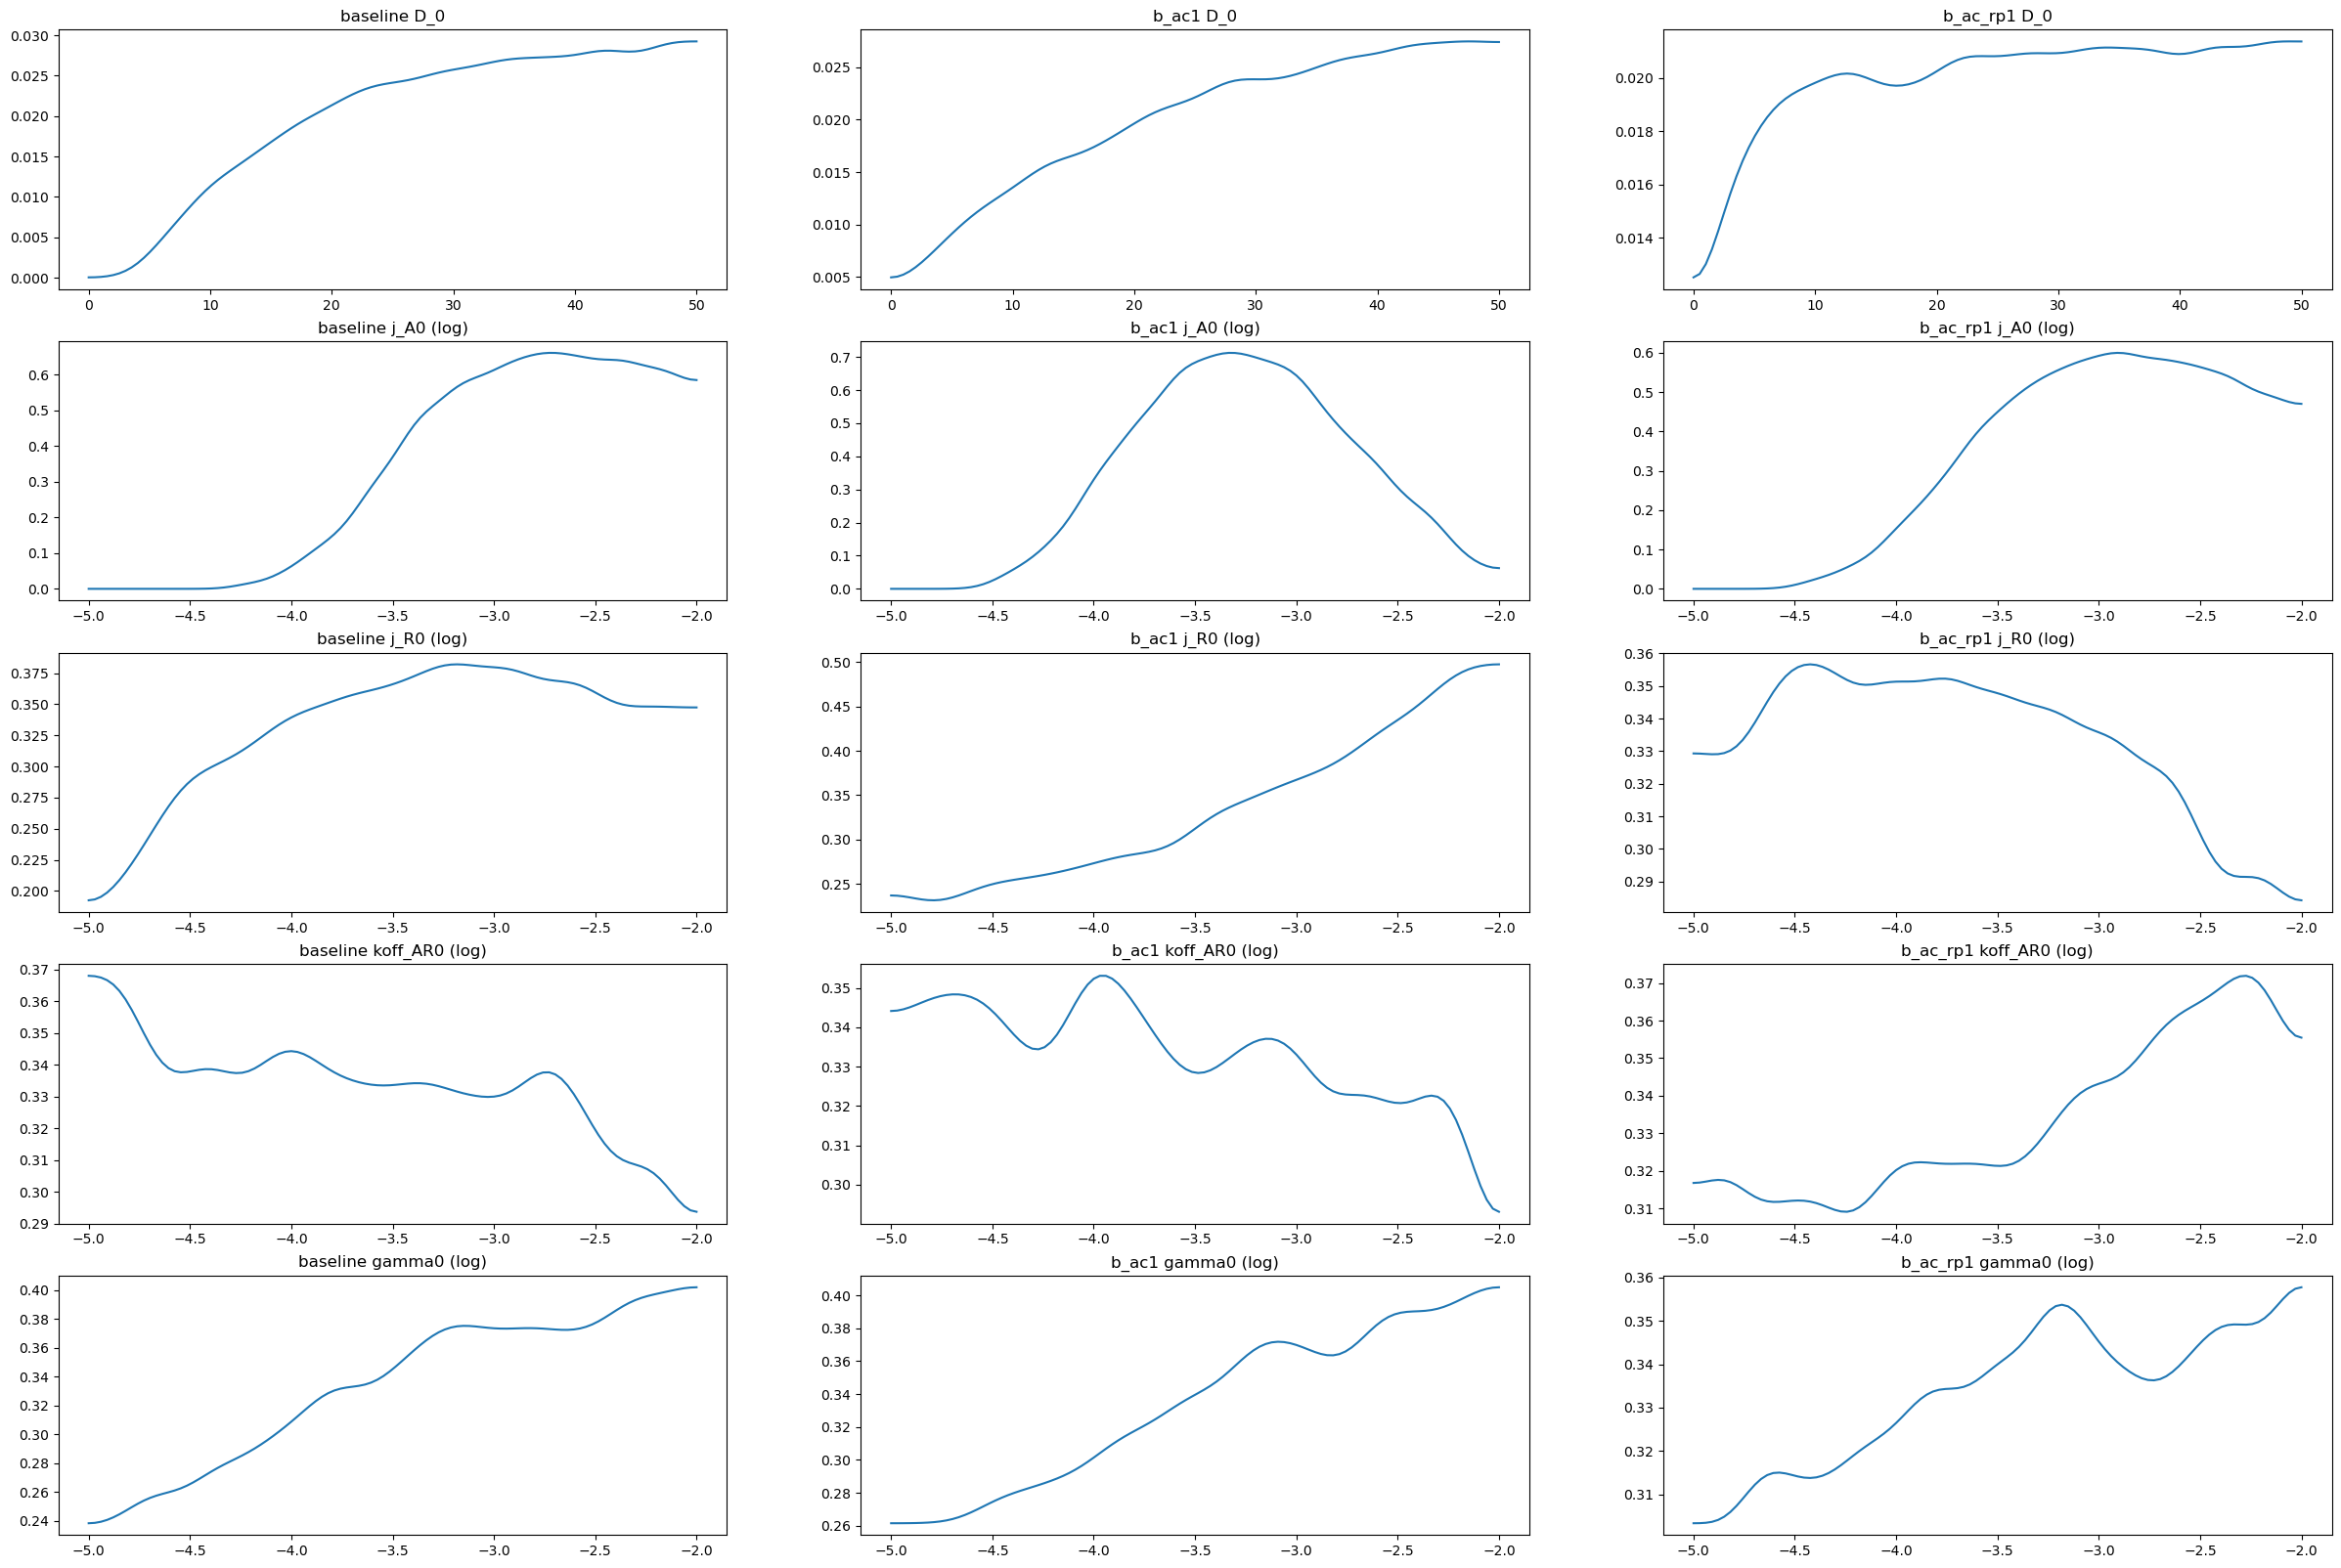

In [ ]:
from scipy.stats import norm
import seaborn as sns
from bounded_1d_kde import bounded_1d_kde


n_bins = 40

fig, axs = plt.subplots(5, 3, figsize=(30, 20))

for i, b1 in enumerate(betas):
    proofreading_parameters = simulations.get_parameters_log(
        subsets=[("proofreading", b1), ("active", b1)]
    )
    for j, (parameter, p_min, p_max) in enumerate(
        [
            ("D_0", 0, 50),
            ("j_A0 (log)", -5, -2),
            ("j_R0 (log)", -5, -2),
            ("koff_AR0 (log)", -5, -2),
            ("gamma0 (log)", -5, -2),
            # ("koff_AR0 + gamma0 (log)", np.log10(2e-5), np.log10(1e-3 + 10**-2.5)),
        ]
    ):
        bin_define = np.arange(p_min, p_max, (p_max - p_min) / n_bins)
        hist, bin_edges = np.histogram(
            proofreading_parameters[:, j],
            bins=bin_define
        )

        reflection_kde = bounded_1d_kde(
            proofreading_parameters[:, j],
            xlow=p_min, xhigh=p_max,
            method="Reflection"
        )

        p_smooth = np.linspace(p_min, p_max, 100)
        axs[j, i].plot(
            p_smooth,
            reflection_kde(p_smooth)
        )
        
        axs[j, i].title.set_text("{} {}".format(b1, parameter))


# for j in range(0, 5):
#     y_lim_max = 0
#     for i in range(0, len(betas)):
#         y_lim_max = max(y_lim_max, axs[j, i].get_ylim()[1])
#     for i in range(0, len(betas)):
#         axs[j, i].set_ylim([0, y_lim_max])

plt.show()

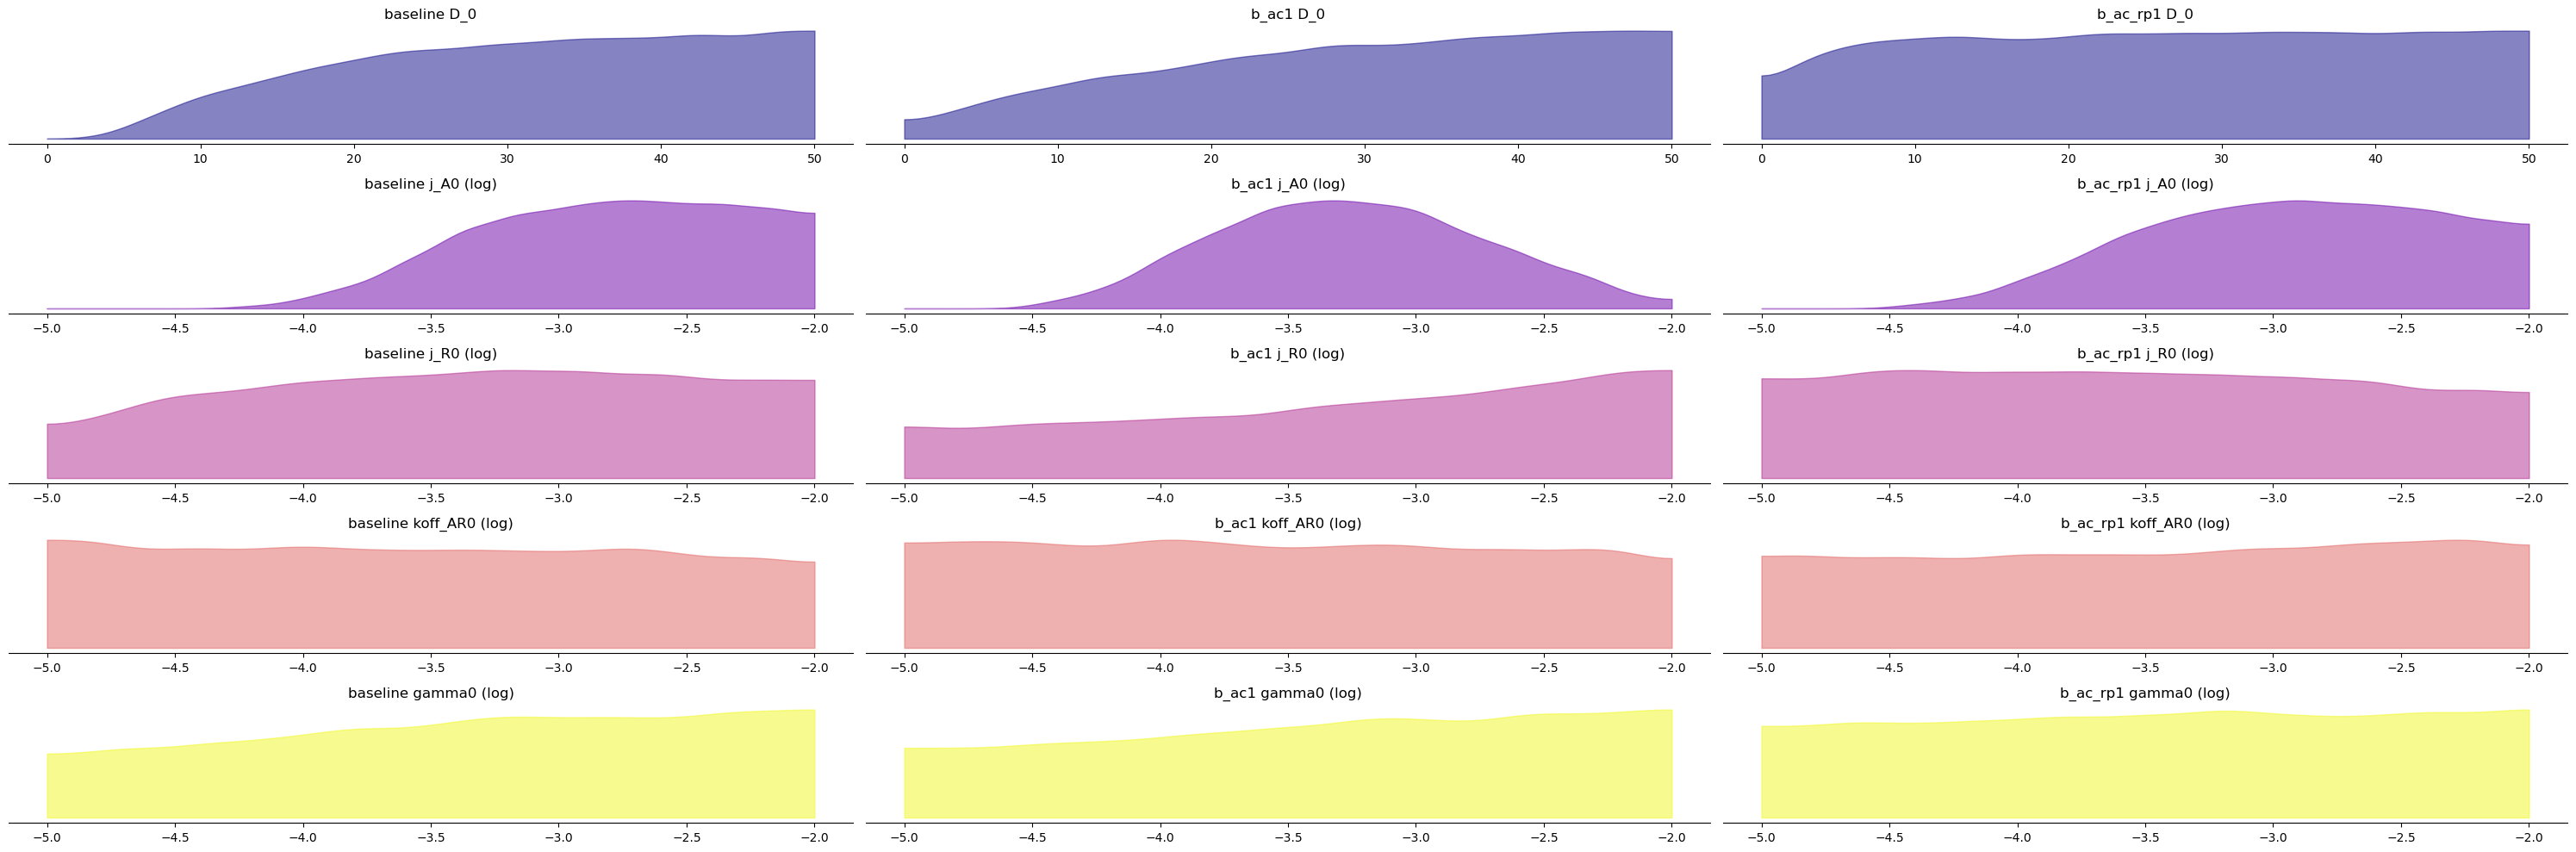

In [58]:
colors = ['#0D0887', '#6A00A8', '#B12A90', '#E16462', '#F0F921']
from scipy.stats import norm
import seaborn as sns
from bounded_1d_kde import bounded_1d_kde
import matplotlib.pyplot as plt
import numpy as np
n_bins = 40
fig, axs = plt.subplots(5, 3, figsize=(30, 10))
# Assuming betas and simulations are defined elsewhere
for i, b1 in enumerate(betas):
    proofreading_parameters = simulations.get_parameters_log(
        subsets=[("proofreading", b1), ("active", b1)]
    )
    for j, (parameter, p_min, p_max) in enumerate(
        [
            ("D_0", 0, 50),
            ("j_A0 (log)", -5, -2),
            ("j_R0 (log)", -5, -2),
            ("koff_AR0 (log)", -5, -2),
            ("gamma0 (log)", -5, -2),
        ]
    ):
        bin_define = np.arange(p_min, p_max, (p_max - p_min) / n_bins)
        hist, bin_edges = np.histogram(
            proofreading_parameters[:, j],
            bins=bin_define
        )
        reflection_kde = bounded_1d_kde(
            proofreading_parameters[:, j],
            xlow=p_min, xhigh=p_max,
            method="Reflection"
        )
        p_smooth = np.linspace(p_min, p_max, 100)
        kde_values = reflection_kde(p_smooth)
        # Fill the area under the curve with color #585857
        axs[j, i].fill_between(p_smooth, kde_values, color=colors[j],alpha=0.5)
        # Set title
        axs[j, i].title.set_text("{} {}".format(b1, parameter))
'''
# Step 1: Unify y-axis limits across all subplots
y_lim_max = 0
for j in range(5):
    for i in range(3):  # Assuming 3 columns based on your subplot grid
        y_lim_max = max(y_lim_max, axs[j, i].get_ylim()[1])
for j in range(5):
    for i in range(3):
        axs[j, i].set_ylim([0, y_lim_max])
'''
# Step 2: Customize axes
for j in range(5):
    for i in range(3):
        # Hide y-axis
        axs[j, i].yaxis.set_visible(False)
        # Ensure only x-axis is visible (spines adjustment)
        axs[j, i].spines['top'].set_visible(False)
        axs[j, i].spines['right'].set_visible(False)
        axs[j, i].spines['left'].set_visible(False)
        axs[j, i].spines['bottom'].set_visible(True)
plt.savefig("kde_change_vs_parameter_20250321.svg")
plt.tight_layout()
plt.show()

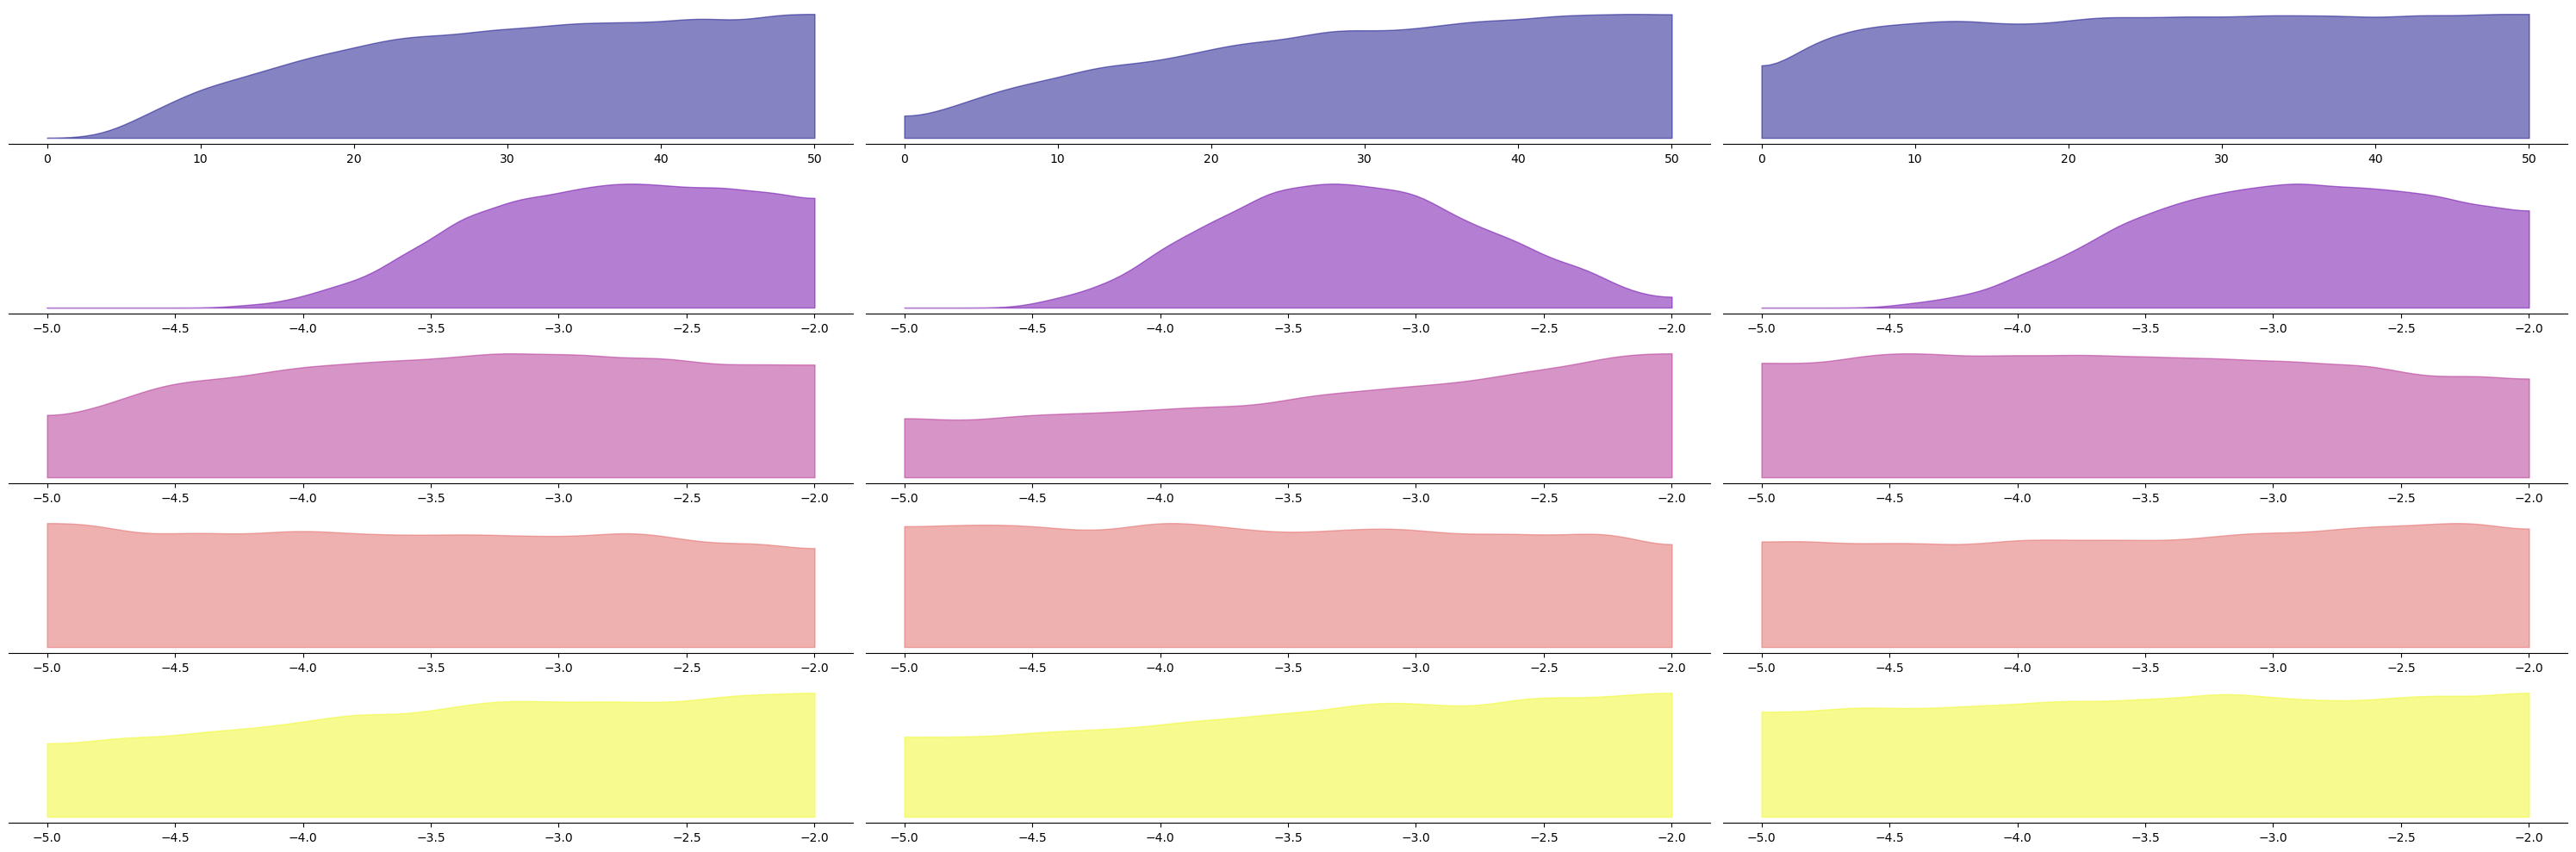

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from bounded_1d_kde import bounded_1d_kde
import seaborn as sns
from scipy.stats import norm
colors = ['#0D0887', '#6A00A8', '#B12A90', '#E16462', '#F0F921']
n_bins = 40
fig, axs = plt.subplots(5, 3, figsize=(30, 10))
# Assuming betas and simulations are defined elsewhere
for i, b1 in enumerate(betas):
    proofreading_parameters = simulations.get_parameters_log(
        subsets=[("proofreading", b1), ("active", b1)]
    )
    for j, (parameter, p_min, p_max) in enumerate(
        [
            ("D_0", 0, 50),
            ("j_A0 (log)", -5, -2),
            ("j_R0 (log)", -5, -2),
            ("koff_AR0 (log)", -5, -2),
            ("gamma0 (log)", -5, -2),
        ]
    ):
        bin_define = np.arange(p_min, p_max, (p_max - p_min) / n_bins)
        hist, bin_edges = np.histogram(
            proofreading_parameters[:, j],
            bins=bin_define
        )
        reflection_kde = bounded_1d_kde(
            proofreading_parameters[:, j],
            xlow=p_min, xhigh=p_max,
            method="Reflection"
        )
        p_smooth = np.linspace(p_min, p_max, 100)
        kde_values = reflection_kde(p_smooth)
        # Fill the area under the curve with the specified color and
        # transparency
        axs[j, i].fill_between(p_smooth, kde_values,
                               color=colors[j], alpha=0.5)
        # Removed title: axs[j, i].title.set_text("{} {}".format(b1, parameter))
# Step 1: Customize axes
for j in range(5):
    for i in range(3):
        # Hide y-axis
        axs[j, i].yaxis.set_visible(False)
        # Hide x-axis tick values
        #axs[j, i].xaxis.set_ticks([])  # This removes the x-axis tick labels
        # Ensure only x-axis spine is visible
        axs[j, i].spines['top'].set_visible(False)
        axs[j, i].spines['right'].set_visible(False)
        axs[j, i].spines['left'].set_visible(False)
        axs[j, i].spines['bottom'].set_visible(True)
plt.tight_layout()
plt.savefig("kde_change_vs_parameter_20250321.svg")
plt.show()